# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:90%;text-align:center;border-radius:10px; border: 2px solidrgb(98, 0, 255); padding: 10px;"> E-Commerce Customer Churn</p>


<div style="text-align: center;">
    <img src="eommerce.webp" alt="Ecommerce Customer Churn" style="width: 1100px; height: 648px; object-fit: cover; display: block; margin: auto;"/>
</div>

## Introduction  

This dataset belongs to an e-commerce company, where we analyze customer behavior to identify those who have churned  
(stopped using the service). Understanding churn patterns helps businesses improve customer retention strategies.  

Our goal is to explore key factors influencing churn, analyze trends, and develop a predictive model to anticipate  
future churn, enabling proactive decision-making to enhance customer experience and engagement.  


### Features and Descriptions  

| Feature Name                     | Description  |
|----------------------------------|------------------------------------------------|
| **CustomerID**                   | Unique identifier for each customer. |
| **Churn**                        | 1 if the customer has churned, 0 otherwise. |
| **Tenure**                        | Number of months the customer has been with the company. |
| **PreferredLoginDevice**         | Device most frequently used to access the platform. |
| **CityTier**                     | Categorization of the city based on infrastructure (1 = highest). |
| **WarehouseToHome**              | Distance between the warehouse and the customer's home (km). |
| **PreferredPaymentMode**         | Payment method most frequently used by the customer. |
| **Gender**                       | Gender of the customer (Male/Female). |
| **HourSpendOnApp**               | Average number of hours spent on the app per day. |
| **NumberOfDeviceRegistered**     | Number of devices linked to the customer's account. |
| **PreferedOrderCat**             | Most frequently ordered product category. |
| **SatisfactionScore**            | Customer's satisfaction rating (1 to 5). |
| **MaritalStatus**                | Marital status of the customer (Single/Married). |
| **NumberOfAddress**              | Number of addresses registered by the customer. |
| **Complain**                     | 1 if the customer has filed a complaint, 0 otherwise. |
| **OrderAmountHikeFromlastYear**  | Percentage increase in order amount from last year. |
| **CouponUsed**                   | Number of coupons used by the customer. |
| **OrderCount**                   | Total number of orders placed. |
| **DaySinceLastOrder**            | Number of days since the last order. |
| **CashbackAmount**               | Total cashback received by the customer. |


<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    IMPORTING LIBRARIES
</p>


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import skew
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
import math
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from category_encoders import OneHotEncoder,BinaryEncoder
import warnings
warnings.filterwarnings('ignore')

<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    LOADING DATASET
</p>


In [254]:
df=pd.read_csv("E Commerce Dataset.csv")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [255]:
df.shape

(5630, 20)

<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    DATA OVERVIEW
</p>


In [256]:
def data_info(data):

    """
    This function returns a DataFrame containing the summary information for each column 
    """

    Names=[col for col in data]
    data_types=[data[col].dtype for col in data.columns]
    top_10_unique_values=[data[col].value_counts().head(10).index.to_list() for col in data.columns]
    nunique_values=[data[col].nunique() for col in data.columns]
    nulls=[data[col].isnull().sum() for col in data.columns]
    percent_of_Nulls= [data[col].isnull().sum()/len(data)*100 for col in data.columns]
    duplicates=data.duplicated().sum()


    info_df=pd.DataFrame({'Name':Names,
                          'Data_Type':data_types,
                          'Top_10_Unique_Values':top_10_unique_values,
                          'Nunique_Values':nunique_values,
                          'Nulls':nulls,
                          'Percent_of_Nulls':percent_of_Nulls,
                          'Duplicates':duplicates})
    return info_df

In [257]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,CustomerID,int64,"[50001, 53751, 53759, 53758, 53757, 53756, 537...",5630,0,0.000000,0
1,Churn,int64,"[0, 1]",2,0,0.000000,0
2,Tenure,float64,"[1.0, 0.0, 8.0, 9.0, 7.0, 10.0, 5.0, 4.0, 3.0,...",36,264,4.689165,0
3,PreferredLoginDevice,object,"[Mobile Phone, Computer, Phone]",3,0,0.000000,0
4,CityTier,int64,"[1, 3, 2]",3,0,0.000000,0
5,WarehouseToHome,float64,"[9.0, 8.0, 7.0, 16.0, 14.0, 6.0, 15.0, 10.0, 1...",34,251,4.458259,0
6,PreferredPaymentMode,object,"[Debit Card, Credit Card, E wallet, UPI, COD, ...",7,0,0.000000,0
7,Gender,object,"[Male, Female]",2,0,0.000000,0
8,HourSpendOnApp,float64,"[3.0, 2.0, 4.0, 1.0, 0.0, 5.0]",6,255,4.529307,0
9,NumberOfDeviceRegistered,int64,"[4, 3, 5, 2, 1, 6]",6,0,0.000000,0


## dropping irrelevant columns

In [258]:
df.drop("CustomerID",inplace=True,axis=1)

In [259]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Churn,int64,"[0, 1]",2,0,0.000000,556
1,Tenure,float64,"[1.0, 0.0, 8.0, 9.0, 7.0, 10.0, 5.0, 4.0, 3.0,...",36,264,4.689165,556
2,PreferredLoginDevice,object,"[Mobile Phone, Computer, Phone]",3,0,0.000000,556
3,CityTier,int64,"[1, 3, 2]",3,0,0.000000,556
4,WarehouseToHome,float64,"[9.0, 8.0, 7.0, 16.0, 14.0, 6.0, 15.0, 10.0, 1...",34,251,4.458259,556
5,PreferredPaymentMode,object,"[Debit Card, Credit Card, E wallet, UPI, COD, ...",7,0,0.000000,556
6,Gender,object,"[Male, Female]",2,0,0.000000,556
7,HourSpendOnApp,float64,"[3.0, 2.0, 4.0, 1.0, 0.0, 5.0]",6,255,4.529307,556
8,NumberOfDeviceRegistered,int64,"[4, 3, 5, 2, 1, 6]",6,0,0.000000,556
9,PreferedOrderCat,object,"[Laptop & Accessory, Mobile Phone, Fashion, Mo...",6,0,0.000000,556


In [260]:
df.describe().T.style.bar(subset=['mean'], color='#FFA07A').background_gradient(
    subset=['std', '50%', 'max'], cmap='Blues').set_properties(
        **{'font-size': '12pt', 'border': '1.5px solid black'}).set_caption("🔍 Summary Statistics of the Dataset")

,count,mean,std,min,25%,50%,75%,max
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000


## Data Overview Insights

1. **Shape of the Dataset** is **5630 rows** and **20 columns**.

2. **Nulls** are **1,856 null values**, accounting for **33% of the data**.  
   - These missing values will be handled later.

3. **Duplicates** are **556 duplicate rows**, which will be dropped later.

4. **Outliers That Will Be Handled**:  
   - **WarehouseToHome** has a maximum value of **127**, which is significantly higher than the **75th percentile (20)**. This suggests potential outliers.  
   - **DaySinceLastOrder** has a maximum value of **46**, which may indicate inactive users.  
   - **CashbackAmount** has a maximum value of **325**, much higher than the **75th percentile (196)**.

5. **Target Variable: Churn**  
   - **16.8% of customers** have churned (**mean = 0.168**), indicating **class imbalance**.  
   - This imbalance will be addressed using **resampling techniques**.


<a id='1'></a>

<p style="
    background: linear-gradient(to right, #5C4033, #8B5A2B); 
    font-family: 'Times New Roman', serif; 
    color: #F5DEB3; 
    font-size: 30px; 
    text-align: center; 
    border-radius: 12px; 
    padding: 12px; 
    border: 3px solid #D2B48C;
    box-shadow: 2px 2px 10px rgba(210, 180, 140, 0.5);
    font-weight: bold;
    letter-spacing: 1px;
">
    EDA (Exploratory Data Analysis)
</p>


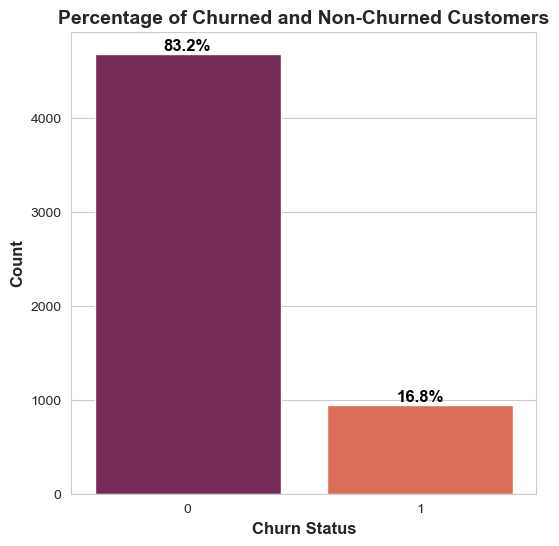

In [261]:
sns.set_style("whitegrid")
churn_counts = df["Churn"].value_counts(normalize=True)*100

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=churn_counts.index, y=df["Churn"].value_counts(), palette="rocket")

plt.title("Percentage of Churned and Non-Churned Customers", fontsize=14, fontweight='bold')
plt.xlabel("Churn Status", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')

for p, percentage in zip(ax.patches, churn_counts.values):
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='black')
plt.show()

## Customer Churn insight
1.**Most Customers Did Not Churn**:

- The majority of customers (83.2%) remained with the company (churn status = 0).
- Only 16.8% of customers churned (left the company, churn status = 1).

2. **Since 83.2% of customers stayed**, the company has a relatively high customer retention rate.

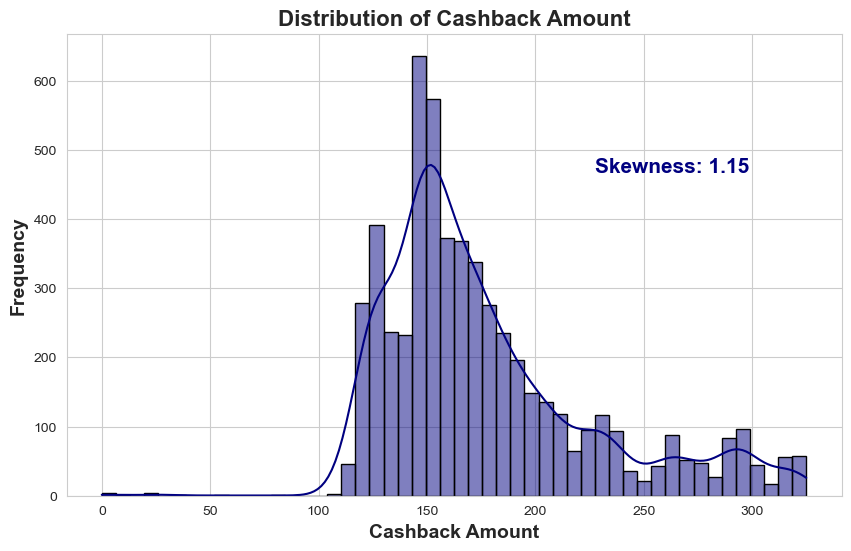

In [262]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

skewness = skew(df["CashbackAmount"], nan_policy="omit")
sns.histplot(df["CashbackAmount"], bins=50, kde=True, color="navy", edgecolor="black")

plt.xlabel("Cashback Amount", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.title("Distribution of Cashback Amount", fontsize=16, fontweight='bold')

plt.text(
    x=df["CashbackAmount"].max() * 0.7,  
    y=plt.gca().get_ylim()[1] * 0.7,
    s=f"Skewness: {skewness:.2f}", 
    fontsize=15, fontweight="bold", color="navy"
)

plt.show()

## **Analysis of Cashback Distribution**

### **Right-Skewed Distribution (Positive Skewness = 1.15)**
- The distribution has a **longer tail on the right side**, indicating that while most cashback amounts are concentrated at **lower values (around 150)**, some **higher cashback amounts exist but are less frequent**.  
- This suggests that a **few customers receive significantly higher cashback amounts** compared to the majority.  

### **Most Common Cashback Amounts**
- The highest frequency is **around 140-160**, meaning that most cashback transactions fall within this range.  
- If cashback is part of a **promotional strategy**, this could indicate a **standard or average cashback amount** frequently awarded.  

### **Outliers in the Distribution**
- **Cashback amounts are mostly between 140-160**, but higher values create **right skewness**.  
- **Two types of outliers:**  
  - **Left-side (Zero cashback)** → System restrictions or eligibility issues.  
  - **Right-side (High cashback)** → Big spenders or potential anomalies.  


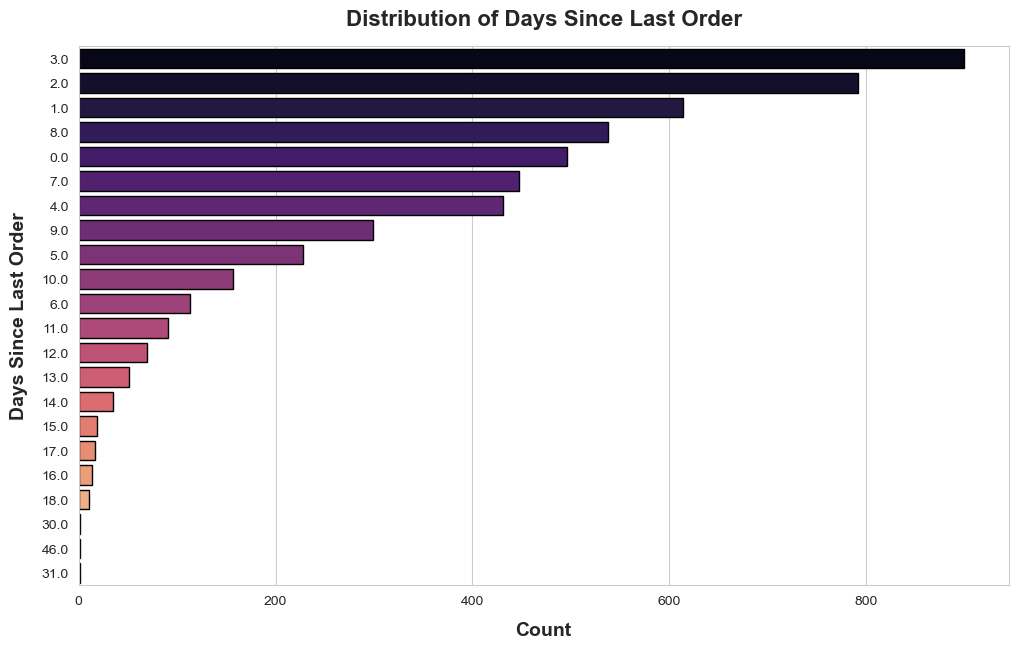

In [263]:
plt.figure(figsize=(12, 7))

sns.countplot(
    y=df["DaySinceLastOrder"], 
    order=df["DaySinceLastOrder"].value_counts().index, 
    palette="magma",  
    edgecolor="black" 
)

plt.xlabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Days Since Last Order", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of Days Since Last Order", fontsize=16, fontweight="bold", pad=15)

plt.show()

# **Customer Order Analysis and Insights**

## **1. Recency of Customer Orders**
- The majority of customers have placed their last order within the past **3 days**.
- The most common values are **8, 1, 2, and 3 days**.
- As the number of days since the last order increases, the frequency decreases.

## **2. Potential Customer Segments**
- **Frequent Buyers:** Customers who order within **0-3 days** may be highly engaged and loyal.
- **Occasional Buyers:** Customers with a gap of **5-10 days** could be targeted with re-engagement strategies.
- **Churned Customers:** Customers with gaps of **30+ days** may need win-back campaigns.

## **3. Business Strategy Implications**
- Consider **loyalty programs** or **personalized discounts** for customers who haven’t ordered in **10+ days**.
- **Retention campaigns** should focus on the **5-10 day segment** to prevent churn.


In [264]:
hike_counts = df["OrderAmountHikeFromlastYear"].value_counts().reset_index()
hike_counts.columns = ["OrderAmountHikeFromLastYear", "CustomerCount"]

fig = px.bar(hike_counts, 
             x="OrderAmountHikeFromLastYear", 
             y="CustomerCount", 
             title="Distribution of Order Amount Hike From Last Year",
             labels={"OrderAmountHikeFromLastYear": "Order Amount Hike From Last Year (%)", 
                     "CustomerCount": "Customer Count"},
             color="CustomerCount", 
             color_continuous_scale="ylgnbu")  

fig.update_layout(
    title=dict(font=dict(size=24, family="Arial", color="black", weight="bold")),
    xaxis=dict(title_font=dict(size=20, family="Arial", color="black", weight="bold"), 
               tickfont=dict(size=16, family="Arial", color="black")),
    yaxis=dict(title_font=dict(size=20, family="Arial", color="black", weight="bold"), 
               tickfont=dict(size=16, family="Arial", color="black")),
    coloraxis_colorbar=dict(title_font=dict(size=16, family="Arial", color="black", weight="bold"))
)

fig.update_layout(xaxis_tickangle=-45)  
fig.show()


# Insights from Order Amount Hike Distribution

## Most Common Order Hike Values:
- The most frequent **order amount hike values** appear to be around **12% to 14%**, as these bars have the highest customer counts.
- These values indicate that the majority of customers experienced a **moderate increase** in order amounts.

## Decrease in Customer Count with Higher Hike:
- As the **Order Amount Hike (%)** increases beyond **16%**, the **number of customers decreases**.
- This suggests that **fewer customers accept or continue purchasing** with higher price increases.

## Distribution Pattern:
- The distribution is **right-skewed**, meaning **most customers** have smaller order amount hikes, while **only a few** have significantly larger hikes.

## Business Implications:
- **Price Sensitivity:** Customers are **price-sensitive**; significant hikes in order amounts lead to **customer drop-offs**.
- **Optimal Pricing Strategy:** Keeping **order hikes in the 12%–14% range** seems to **retain the most customers**.
- **Potential Revenue Loss:** If price hikes **continue to rise above 16%-18%**, a considerable portion of the **customer base may stop purchasing**.


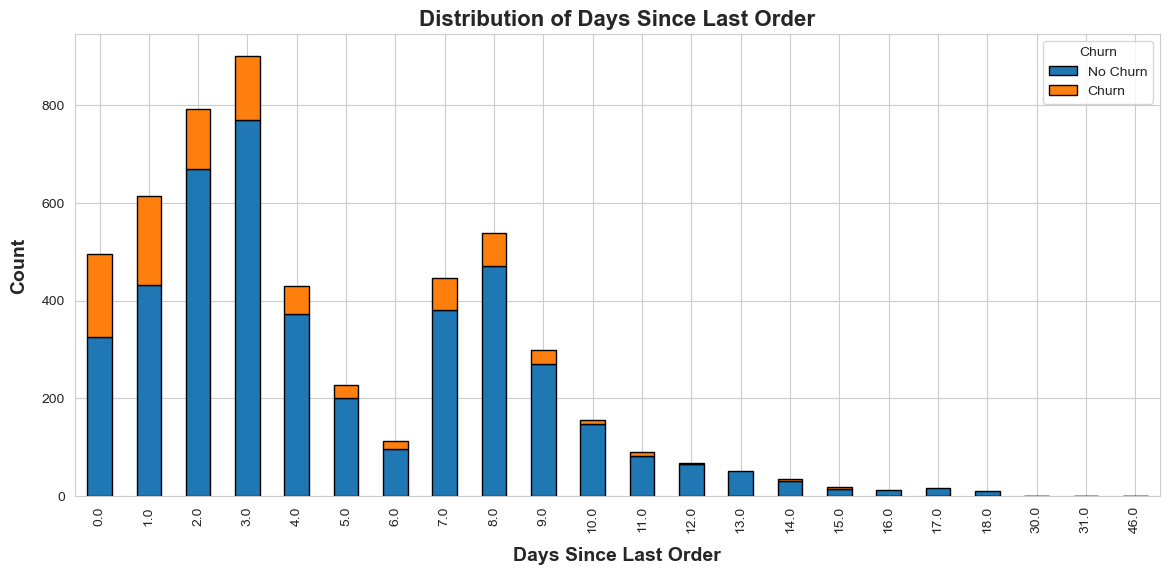

In [265]:
order_counts = df.groupby(["DaySinceLastOrder", "Churn"]).size().unstack()

order_counts.plot(kind="bar", stacked=True, figsize=(14, 6), color=['#1f77b4', '#ff7f0e'], edgecolor="black")

plt.xlabel("Days Since Last Order", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of Days Since Last Order", fontsize=16, fontweight="bold")

plt.legend(title="Churn", labels=["No Churn", "Churn"])
plt.show()

# Customer Purchase Behavior With Churn 

### Frequent Purchasers
- **Observation**: A large proportion of customers exhibit frequent purchasing behavior, with many making repeat purchases within the first 3 to 4 days.
- **Implication**: This indicates a core group of highly engaged and loyal customers who are satisfied with the service or product.

### First-Time Users Who Churn
- **Observation**: Within the same timeframe (first 3 to 4 days), there is a smaller percentage of users who churn.
- **Implication**: These users might be first-time customers who download the app or use the web service once but do not return for subsequent purchases. This suggests a need to improve the onboarding experience or offer incentives to convert first-time users into repeat customers.

### Long-Term Inactive Customers
- **Observation**: There is a noticeable percentage of customers who have not made a purchase in a long time (e.g., 20-26 days).
- **Implication**: These customers are at risk of churning. Targeted retention strategies, such as personalized offers or re-engagement campaigns, may be necessary to bring them back.

## Recommendations
1. **Enhance Onboarding Experience**: Improve the first-time user experience to increase the likelihood of repeat purchases.
2. **Retention Campaigns**: Implement targeted marketing campaigns for customers who have not made a purchase in a while.
3. **Loyalty Programs**: Introduce or enhance loyalty programs to reward frequent purchasers and encourage continued engagement.


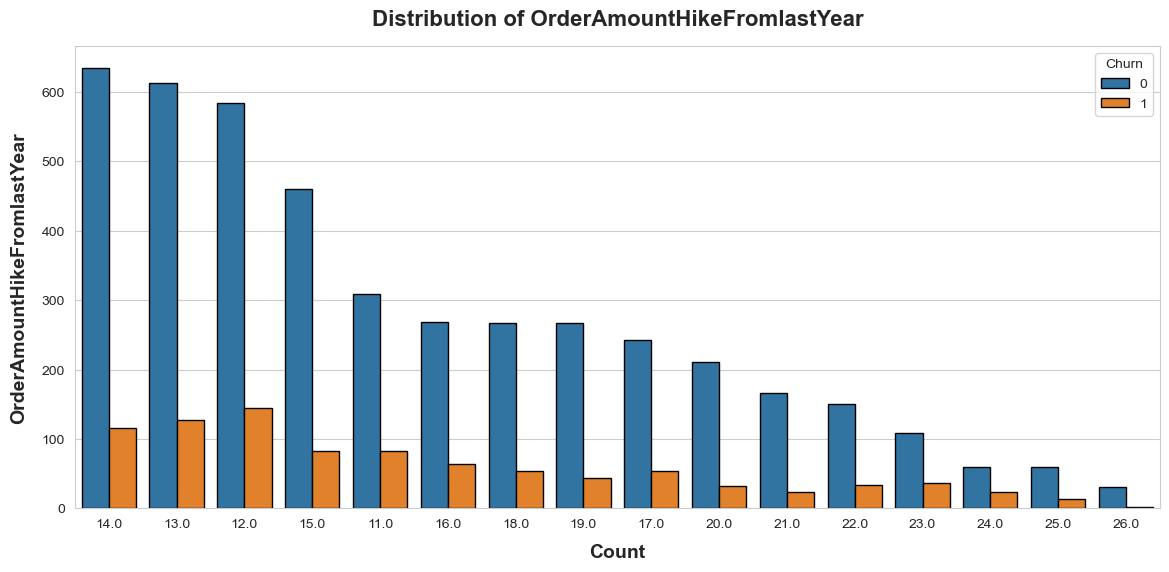

In [266]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["OrderAmountHikeFromlastYear"], 
    order=df["OrderAmountHikeFromlastYear"].value_counts().index, 
    palette=['#1f77b4', '#ff7f0e'],  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("OrderAmountHikeFromlastYear", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of OrderAmountHikeFromlastYear", fontsize=16, fontweight="bold", pad=15)

plt.show()

# **Insights from Order Amount Hike With Churn**

## **1. Order Hike Range 12-15: High Customer Frequency, Low Churn Rate**
- Most customers fall into this range, meaning a large portion of the customer base experiences a **moderate order amount hike** from last year.
- **Churn exists but is relatively low**, indicating that only a small percentage of these customers leave.
- This suggests that while some customers may churn due to the increase, **most are comfortable with this level of hike** and continue purchasing.

## **2. Higher Order Amount Hikes (Above 20): Fewer Customers, But High Retention**
- There are fewer customers experiencing very high order hikes (above 20), but **a high percentage of them remain** (blue bars dominate).
- This indicates that customers receiving **higher cashback or incentives** are more likely to stay.
- These customers might be **loyal, high-value customers** who continue despite the hike because of the perceived value they receive.

## **Key Takeaways**
- **A moderate price hike (12-15) retains the majority of customers**, but a small percentage may churn due to price sensitivity.
- **High cashback or incentives for customers with higher order hikes (20+)** encourage them to stay, even though they are fewer in number.
- Businesses can **optimize cashback strategies** to increase retention and reduce churn among price-sensitive customers.

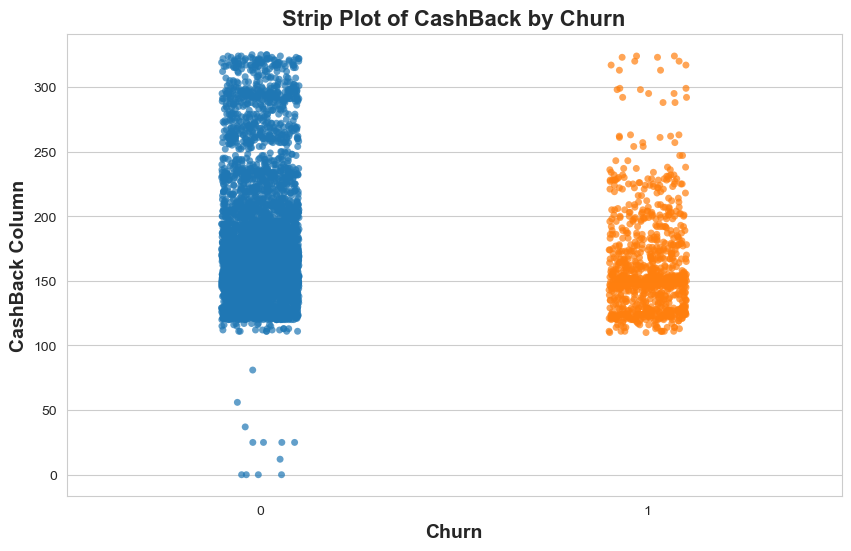

In [267]:
plt.figure(figsize=(10, 6))
sns.stripplot(x=df["Churn"], y=df["CashbackAmount"], jitter=True, alpha=0.7, palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Churn", fontsize=14, fontweight="bold")
plt.ylabel("CashBack Column", fontsize=14, fontweight="bold")
plt.title("Strip Plot of CashBack by Churn", fontsize=16, fontweight="bold")
plt.show()

# **Insights from Strip Plot: Cashback vs. Churn**

### **1. Distribution of Cashback Values**
- The **blue dots (non-churners, 0)** show a **higher density and wider range** of cashback values.
- The **orange dots (churners, 1)** are more **concentrated in a narrower range** with generally lower cashback values.
- Cashback values **above 250** are significantly **more frequent in the non-churn group**.

### **2. Higher Cashback May Reduce Churn**
- Customers receiving **higher cashback amounts are more likely to stay (non-churners).**
- Churners tend to have received cashback within a **narrower range** and at **lower values**.
- A few non-churners received **low cashback (near 0-50),** but they are not dominant.
- This suggests that **cashback is an important factor in retention, but not the only one.**

### **3. Business Takeaways**
- **Providing higher cashback incentives may help retain customers and reduce churn.**
- **Customers with lower cashback amounts are more likely to churn**, suggesting the need for an optimized cashback strategy.

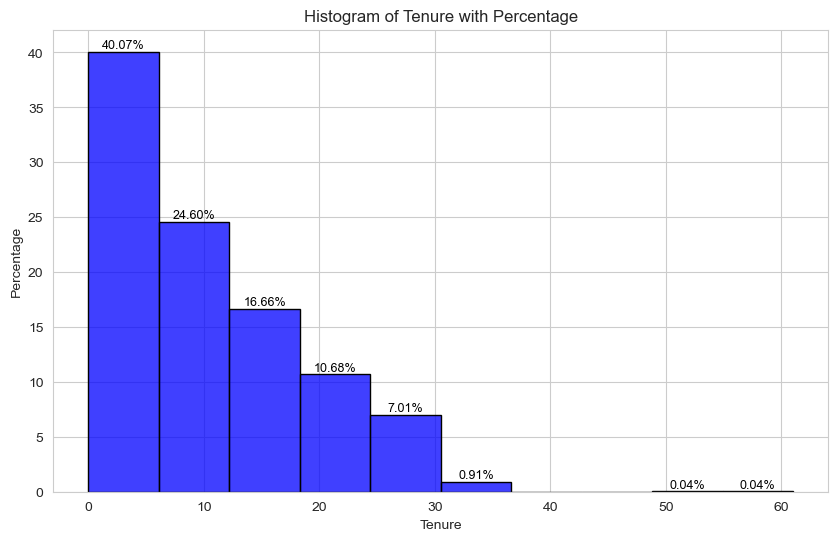

In [268]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Tenure', bins=10, color='blue', edgecolor='black', stat='percent')

for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height, 
                 f'{height:.2f}%', ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Tenure')
plt.ylabel('Percentage')
plt.title('Histogram of Tenure with Percentage')
plt.show()

## From the Tenure Distribution: 
- we can observe that the majority of customers remain within a tenure range of 0 to 6.5 months. This indicates that customer retention - is relatively low beyond this period.

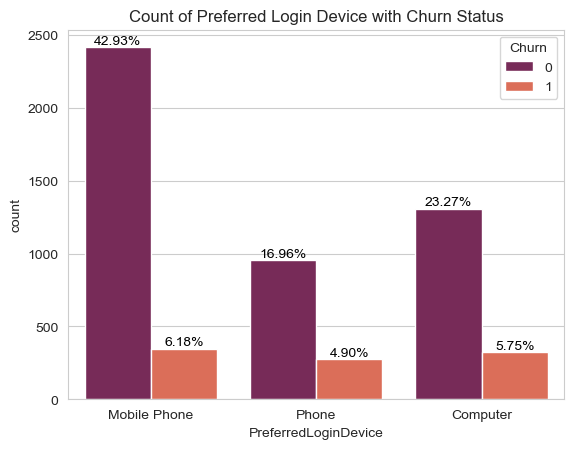

In [269]:
ax = sns.countplot(x='PreferredLoginDevice', data=df, palette='rocket',hue="Churn")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                f'{height/len(df)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Count of Preferred Login Device with Churn Status')
plt.show()

## Insights from Preferred Login Device with Churn Status

- The majority of users (42.93%) prefer to log in using **Mobile Phones**, with a significant portion of these users not churning. Only 6.18% of mobile phone users have churned.

- **Computers** are the second most popular login device, with 23.27% of users opting for this method. A relatively small portion (5.75%) of these users have churned.

- **Phones (other than mobile phones)** account for 16.96% of the user base, with 4.90% of these users churning.

### Additional Insights:
- Across all device types, the majority of users have not churned, indicating overall customer retention is strong.
- Mobile phone users have the highest churn count in absolute numbers, but this is expected due to their larger user base.
- Users who log in via **Computers** show a slightly higher churn rate compared to phone devices, suggesting they might be less engaged or face usability issues.
- Investigating whether device-specific user experiences impact churn rates could help improve retention strategies.


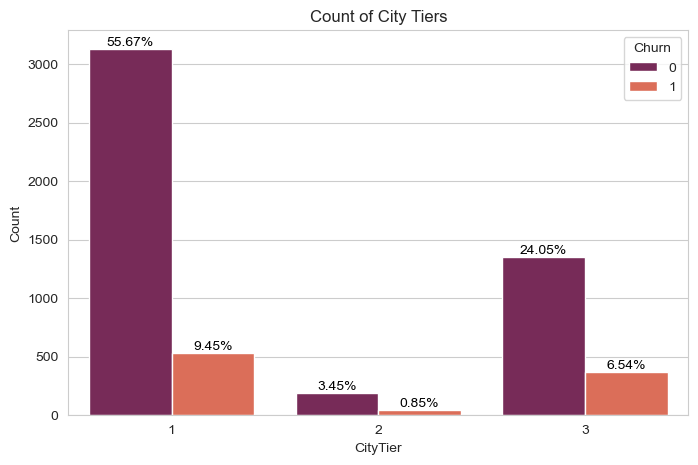

In [270]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df["CityTier"],palette="rocket",hue=df["Churn"])

for patch in ax.patches:
    if patch.get_height()>0:
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                 f'{patch.get_height()/len(df)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')


plt.xlabel("CityTier")
plt.ylabel("Count")
plt.title("Count of City Tiers")
plt.show()

### Insights from the Plot

- **City Tier 1 Dominance:**
  - Majority of users (**55.67%**) are from City Tier 1, with most not churned.
  - However, **9.45%** of Tier 1 users have churned, reflecting higher churn volume due to population size.

- **Lower Participation in City Tier 2:**
  - Lowest user count with **3.45%** non-churned and **0.85%** churned users.
  - Indicates lower market penetration or engagement.

- **Notable Churn in City Tier 3:**
  - Higher churn rate (**6.54%**) compared to Tier 2.
  - Suggests lower satisfaction or engagement.

### Business Tip

- Prioritize retention efforts in **City Tier 1** due to large user base.
- Address pain points in **City Tier 3** for effective churn reduction.


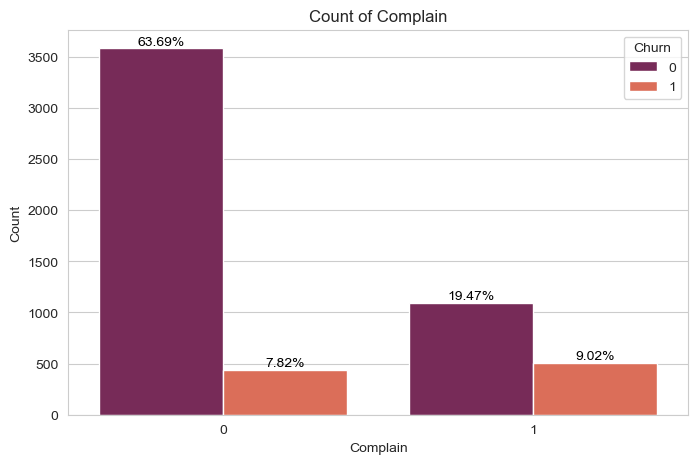

In [271]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=df["Complain"],palette="rocket",hue=df["Churn"])

for patch in ax.patches:
    if patch.get_height()>0:
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(), 
                 f'{patch.get_height()/len(df)*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel("Complain")
plt.ylabel("Count")
plt.title("Count of Complain")
plt.show()

## Analysis of Complaint and Churn Relationship

- The chart illustrates the relationship between customer complaints and churn rate.
- **63.69%** of customers who did **not** make a complaint did **not** churn, indicating strong customer retention.
- Among those who **did** make a complaint, **19.47%** did **not** churn, suggesting that the company's response to complaints may have been effective in satisfying customers.
- **9.02%** of customers who complained still churned, which is relatively low compared to those who stayed.

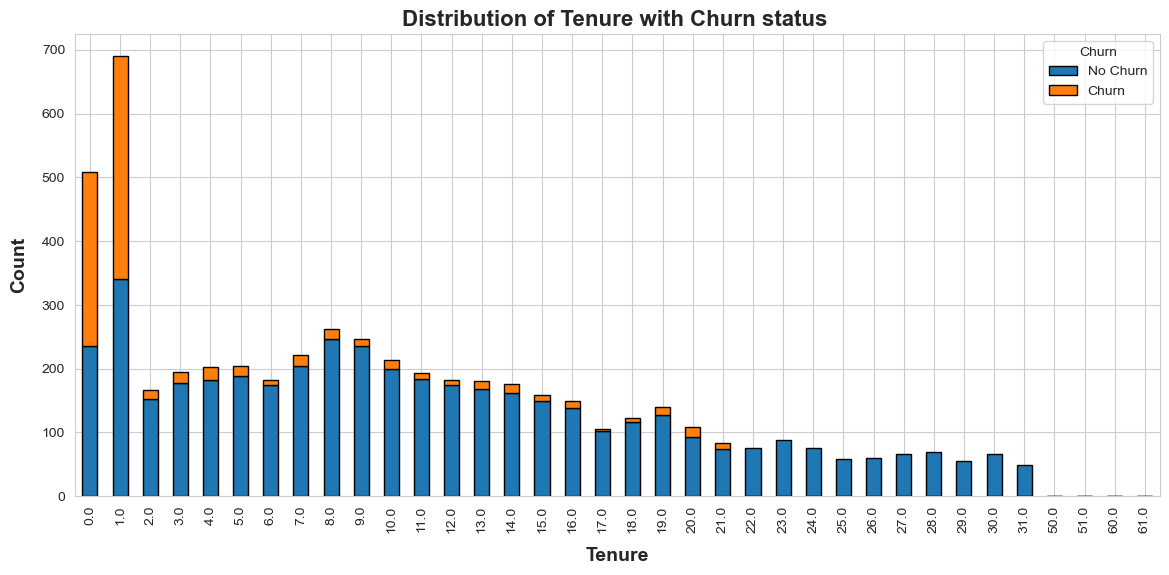

In [272]:
order_counts = df.groupby(["Tenure", "Churn"]).size().unstack()

order_counts.plot(kind="bar", stacked=True, figsize=(14, 6), color=['#1f77b4', '#ff7f0e'], edgecolor="black")

plt.xlabel("Tenure", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of Tenure with Churn status ", fontsize=16, fontweight="bold")

plt.legend(title="Churn", labels=["No Churn", "Churn"])
plt.show()

## **Analysis of Tenure with Churn Status**

### **Key Observations:**

- The distribution plot indicates a significant trend where:
  - For **tenure 0.0 and 1.0**, the number of **churned customers** (orange) is **higher** than the number of **non-churned customers** (blue).
  - For all **remaining tenure values**, the number of **non-churned customers** (blue) is consistently **higher** than the churned customers.

### **Insights:**

- The high churn rate at very short tenures (0-1 months) suggests that customers who join and quickly leave may be dissatisfied or not find immediate value in the service.
- Conversely, customers with longer tenures show greater loyalty or satisfaction, resulting in a lower churn rate.

### **Recommendations for Companies:**

- **Focus on Early Retention:**
  - Investigate and improve the **onboarding process** to enhance the initial user experience.
  - Offer **promotional incentives** or **personalized support** to retain customers within the first few months.

- **Understand User Needs:**
  - Conduct **feedback surveys** for customers who churn within 0-1 months to understand the reasons for early dissatisfaction.
  - Analyze the services or features that long-tenure customers engage with to replicate these experiences for new users.

- **Continuous Engagement:**
  - Implement **loyalty programs** or **customized offers** for long-term customers to maintain satisfaction and reduce the risk of future churn.

---

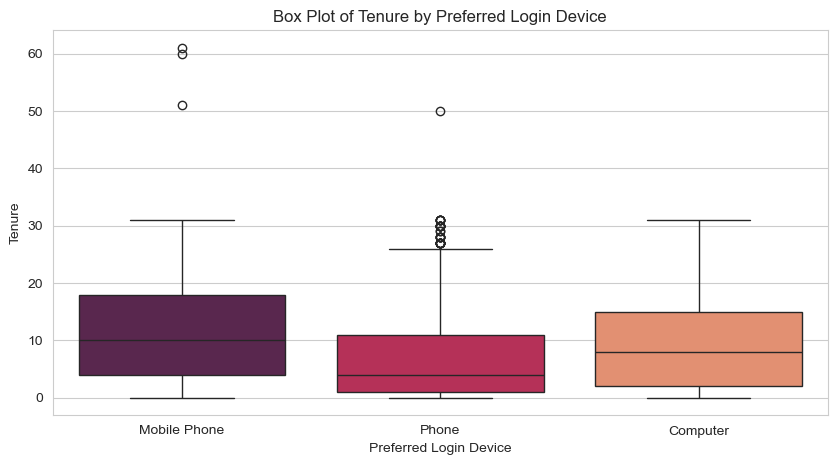

In [273]:
plt.figure(figsize=(10,5))
sns.boxplot(x='PreferredLoginDevice', y='Tenure', data=df,palette="rocket")

plt.xlabel('Preferred Login Device')
plt.ylabel('Tenure')
plt.title('Box Plot of Tenure by Preferred Login Device')
plt.show()

#  **Box Plot Analysis: Tenure by Preferred Login Device**

---

## **1. Overview**
This box plot visualizes the distribution of **tenure** (time spent with the app) across three different **preferred login devices**:  
- **Mobile Phone**  
- **Phone** (likely smartphones)  
- **Computer**  

---

## **2. Key Observations**  
###  **Mobile Phone Users:**  
- Higher median tenure with longer usage times.  
- Fewer outliers, indicating more **consistent** engagement.  

###  **Phone Users:**  
- Lower median tenure compared to other devices.  
- Many outliers, suggesting a **small group** of heavy users.  
- Overall, most users spend **shorter durations**.  

###  **Computer Users:**  
- Moderate median tenure with a **fairly wide** interquartile range.  
- Fewer outliers, indicating more **stable** usage patterns.  

---

## **3. Conclusion**  
- **Mobile phone** users tend to spend **longer** time with the app.  
- **Phone** users show **shorter** average usage with some extreme high-use outliers.  
- **Computer** users exhibit **moderate** and consistent usage.  




Text(0.5, 1.0, 'Count of Preferred Login Device by CityTier Status')

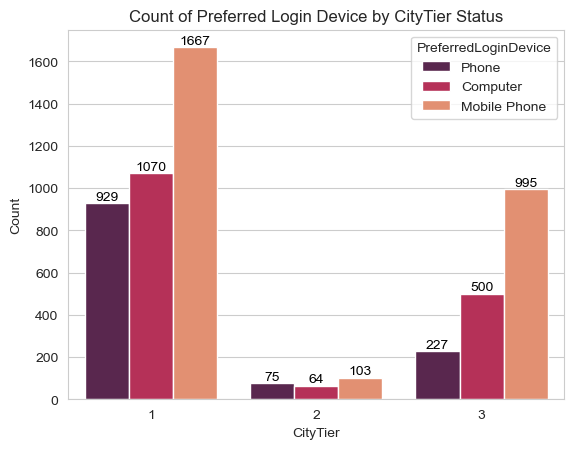

In [274]:
ax = sns.countplot(x='CityTier', data=df, hue='PreferredLoginDevice',palette="rocket")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                int(height), ha='center', va='bottom', fontsize=10, color='black')
        
plt.xlabel('CityTier')
plt.ylabel('Count')
plt.title('Count of Preferred Login Device by CityTier Status')

## Analysis of Preferred Login Device by City Tier

### Key Observations:
- **City Tier 1** has the **highest number** of users across all device types, with **mobile phones** being the most preferred.
- **City Tier 3** shows notable usage, predominantly through **mobile phones** and **computers**.
- **City Tier 2** has the **lowest** user engagement across all device types.

### Conclusion:
- **Mobile phones** are the most commonly used devices, especially in **City Tier 1**, reflecting higher accessibility and smartphone penetration.

Text(0.5, 1.0, 'Churn Status by Marital Status')

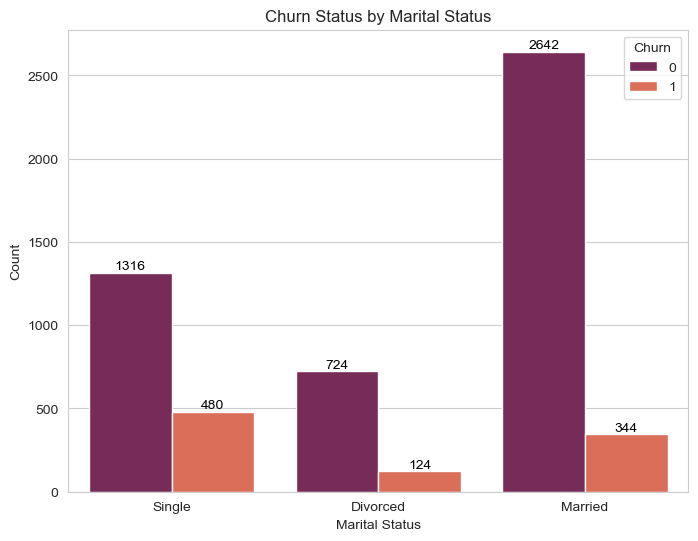

In [275]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df["MaritalStatus"],hue=df["Churn"],palette="rocket")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                int(height), ha='center', va='bottom', fontsize=10, color='black')
        
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Churn Status by Marital Status")

## Insights from Churn Status by Marital Status

### 1. **Married Customers Form the Largest Customer Base:**
- Married customers dominate the dataset with the highest number of customers who do not churn (2,642). This suggests they form the core of the customer base.
- They also have the highest absolute number of churned customers (344), likely due to their large population size.

### 2. **Churn Proportion is Highest Among Singles:**
- Singles have a lower total population compared to married customers, but a relatively higher churn rate.
- Out of 1,796 single customers, 480 churned, indicating they may be more prone to leaving.

### 3. **Divorced Customers are the Smallest Group:**
- Divorced customers form the smallest demographic segment.
- Despite the smaller population, 124 out of 848 churned, showing a moderate churn rate.

## **Potential Business Strategies:**

- **Retention Strategies for Singles:**
  - Implement personalized services or exclusive offers to reduce churn.

- **Loyalty Programs for Married Customers:**
  - Maintain or improve retention with loyalty programs or incentives.

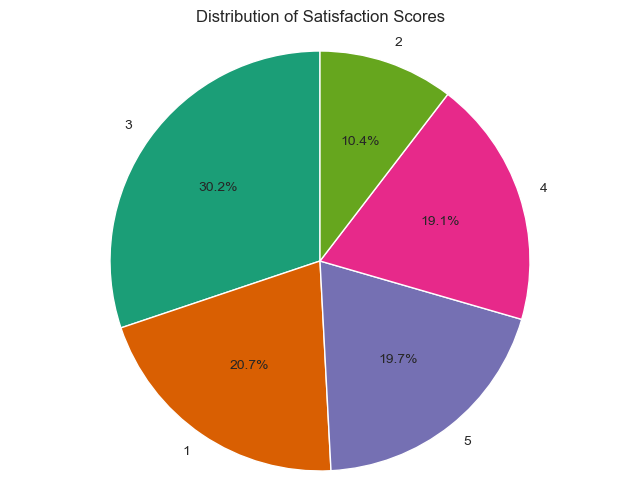

In [276]:
satisfaction_counts = df["SatisfactionScore"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(satisfaction_counts, 
        labels=satisfaction_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Dark2.colors)

plt.title("Distribution of Satisfaction Scores")
plt.axis('equal')
plt.show()

## **Customer Satisfaction Analysis**

### 🔍 **Key Insights:**

1. **High Overall Satisfaction:**
   - Approximately **70%** of customers rated their satisfaction as **3 or above**, indicating a generally positive customer experience.

2. **Moderate Satisfaction Dominance:**
   - The largest segment (**30.2%**) is represented by customers who gave a score of **3**, suggesting moderate satisfaction. This group could potentially be nudged towards higher satisfaction with targeted improvements.

3. **Balanced High Scores:**
   - Higher satisfaction scores (**4 and 5**) together account for nearly **39%**, indicating a significant portion of highly satisfied customers.

4. **Low Satisfaction (Score 2):**
   - A smaller portion (**10.4%**) of customers gave a score of **2**, which could signal early signs of dissatisfaction or unmet expectations.

---

### 💡 **Business Recommendations:**

- **Focus on Moderate Scores (3):**
  - Engage with moderately satisfied customers to understand their needs and convert them into highly satisfied and loyal customers.

- **Enhance Positive Experiences:**
  - Analyze the key drivers behind high satisfaction scores (**4 and 5**) and leverage these strengths in marketing and customer service strategies.

- **Address Dissatisfaction Early:**
  - Investigate the concerns of customers who gave scores of **2 and 1**, offering personalized support or service recovery to reduce churn.

---

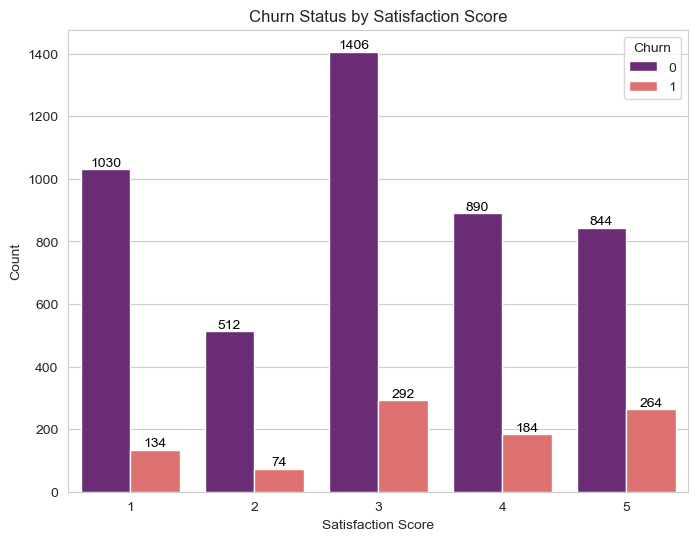

In [277]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x=df["SatisfactionScore"],hue=df["Churn"],palette="magma")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2, height, 
                int(height), ha='center', va='bottom', fontsize=10, color='black')
        
    
plt.xlabel("Satisfaction Score")
plt.ylabel("Count")
plt.title("Churn Status by Satisfaction Score")
plt.show()

### Churn vs. Satisfaction Score

Even customers with **high satisfaction scores (4 and 5)** show a **noticeable churn rate**:
- Score 5 → ~23.8% churn  
- Score 4 → ~17.1% churn

🔍 **Why do highly satisfied customers still churn?**
- **One-time usage**: Customers might have had a great experience but only needed the service once.
- **Lack of ongoing need**: Satisfied but no longer interested in future purchases.
- **Better alternatives**: They found more attractive offers elsewhere.
- **Not engaged**: High satisfaction doesn't always mean high engagement or loyalty.

📌 **Takeaway**:  
Customer satisfaction is important, but not enough to prevent churn.  
**Retention strategies** should also focus on **engagement**, **repeat behavior**, and **value delivery over time**.


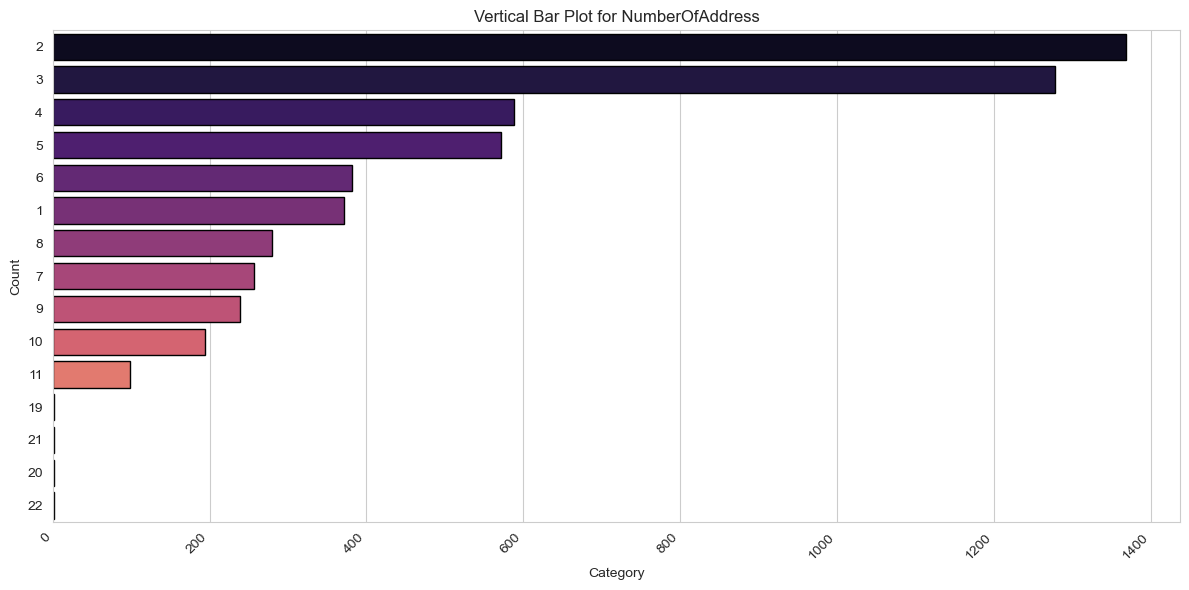

In [278]:
plt.figure(figsize=(12, 6))

sns.countplot(
    y=df["NumberOfAddress"], 
    order=df["NumberOfAddress"].value_counts().index, 
    palette="magma",  
    edgecolor="black" 
)
plt.xticks(rotation=45, ha='right')
plt.title('Vertical Bar Plot for NumberOfAddress')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### 🔍 **Key Insights:**

1. **Dominance of Higher Address Counts:**  
   - Categories **2** and **3** show the highest frequency, indicating that most customers maintain **2 or more addresses**.  
   - Suggests multi-location individuals or multi-user households.

2. **Moderate Usage of Single Address:**  
   - Lower frequency in category **1** suggests fewer customers have a **single address**.  
   - Indicates higher engagement from multi-address users.

3. **Long Tail Distribution:**  
   - Sharp decline beyond **6**, indicating few customers maintain a large number of addresses.  
   - Likely represents business accounts or high-frequency users.

4. **Possible Correlation with Engagement:**  
   - More addresses might indicate **higher order frequency** or overall **customer loyalty**.  
   - Requires further analysis for confirmation.

5. **Business Opportunity:**  
   - Personalization of delivery offers or location-based promotions could target users with **multiple addresses** for higher retention and engagement.

#   num of addresses

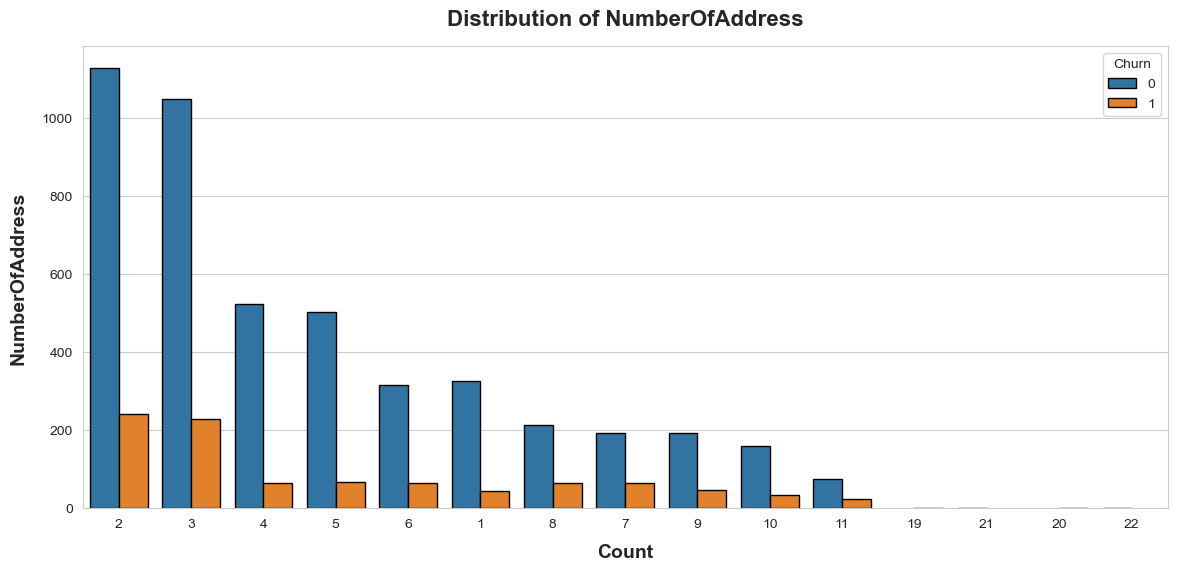

In [279]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["NumberOfAddress"], 
    order=df["NumberOfAddress"].value_counts().index, 
    palette=['#1f77b4', '#ff7f0e'],  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("NumberOfAddress", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of NumberOfAddress", fontsize=16, fontweight="bold", pad=15)

plt.show()

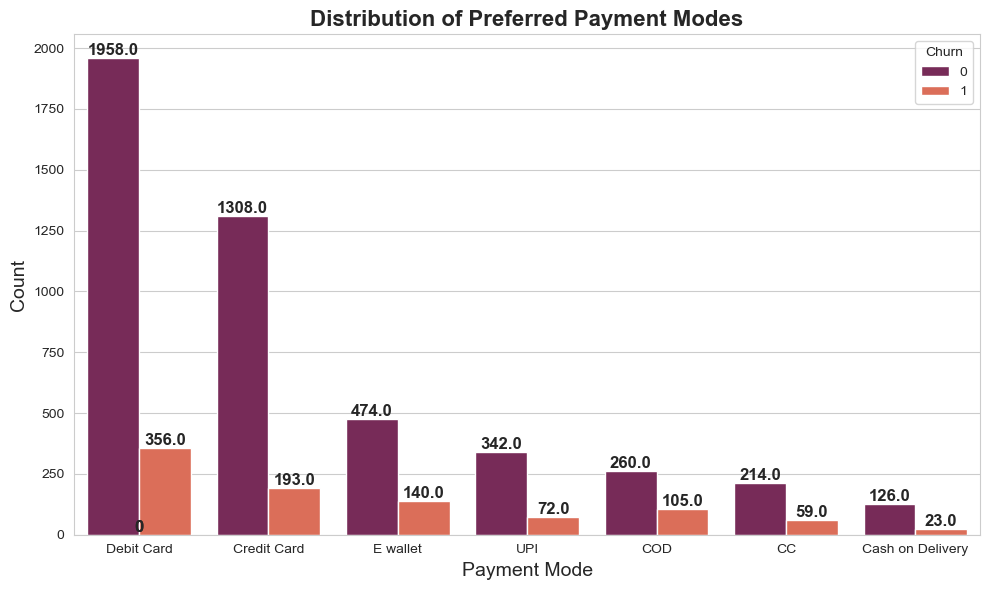

In [280]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  

ax = sns.countplot(
    data=df,
    x="PreferredPaymentMode",
    palette="rocket",  
    order=df["PreferredPaymentMode"].value_counts().index,
    hue=df["Churn"]
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Distribution of Preferred Payment Modes", fontsize=16, fontweight='bold')
plt.xlabel("Payment Mode", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()


## 📌 Insights from Preferred Payment Mode vs Churn Analysis

### 🔍 1. E-Wallet Users Show the Highest Churn Rate
- Although not the most used, **E-wallets have the highest percentage of churned users**.
- ⚠️ Indicates dissatisfaction or issues with the E-wallet experience (trust, usability, rewards).

---

### 🔍 2. Traditional Payment Methods Indicate Customer Loyalty
- **Debit Card, Credit Card, and UPI** have significantly **lower churn rates**.
- ✅ These users are likely more **loyal** or **habitual** in their payment preferences.

---

### 🔍 3. Low Usage + Moderate Churn = Vulnerable Segments
- **Cash on Delivery (COD)** and **Credit Card (CC)** have lower user counts but non-negligible churn.
- 🔄 These segments may require **attention or alternative engagement strategies**.

---

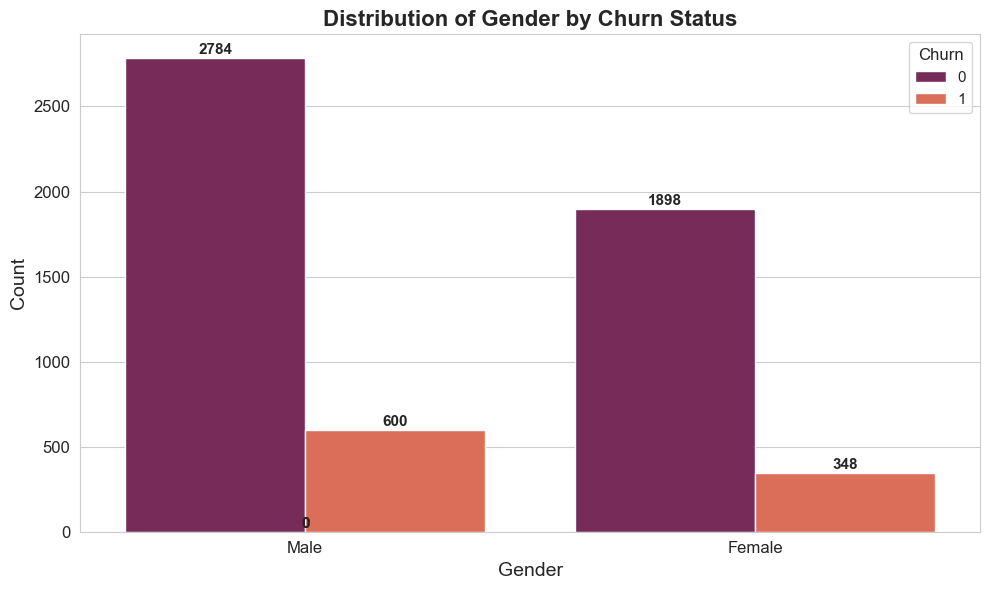

In [281]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x="Gender",
    hue="Churn",
    palette="rocket",
    order=df["Gender"].value_counts().index
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height + 5), 
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

plt.title("Distribution of Gender by Churn Status", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Churn", title_fontsize=12, fontsize=11)

plt.tight_layout()
plt.show()


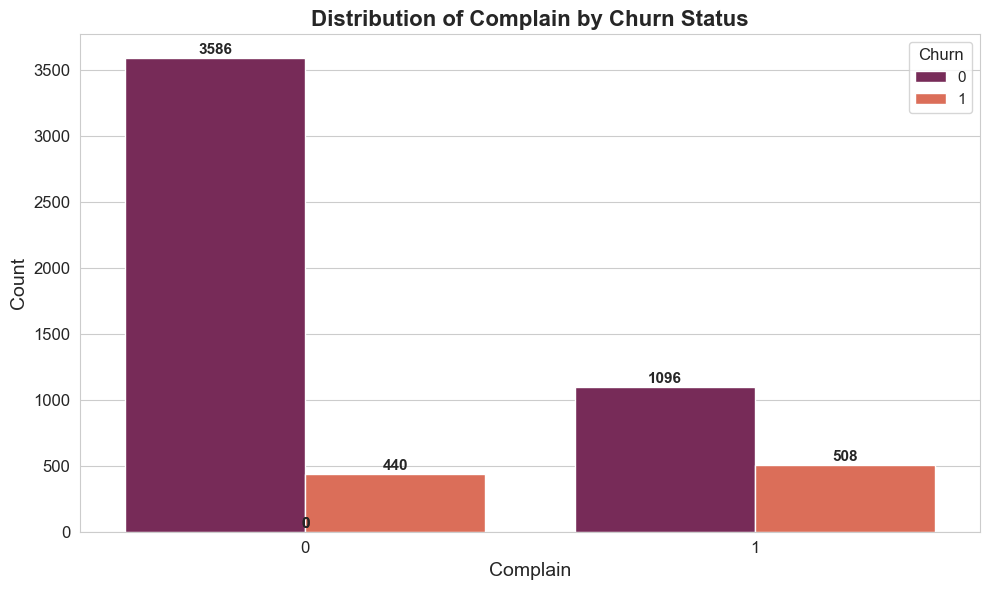

In [282]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.countplot(
    data=df,
    x="Complain",
    hue="Churn",
    palette="rocket",
    order=df["Complain"].value_counts().index
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height + 5), 
                ha='center', va='bottom',
                fontsize=11, fontweight='bold')

plt.title("Distribution of Complain by Churn Status", fontsize=16, fontweight='bold')
plt.xlabel("Complain", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title="Churn", title_fontsize=12, fontsize=11)

plt.tight_layout()
plt.show()


## 📊 Distribution of Complaints by Churn Status - Insights

### ✅ Summary:
- **No Complaint**:  
  - Churn Rate: **~10.9%** (440 / 4026)
- **With Complaint**:  
  - Churn Rate: **~31.7%** (508 / 1604)

---

### 🔥 Key Insights:

1. **Complaints Triple Churn Risk**  
   Users who file complaints are **~3x more likely** to churn compared to those who don’t.

2. **Fewer Complainers, Higher Risk**  
   While fewer users complain, their churn rate is significantly higher — each complaint is a **critical churn signal**.

3. **Retention Opportunity**  
   Proactively resolving complaints can reduce churn. Consider a **priority support program** for complainers.


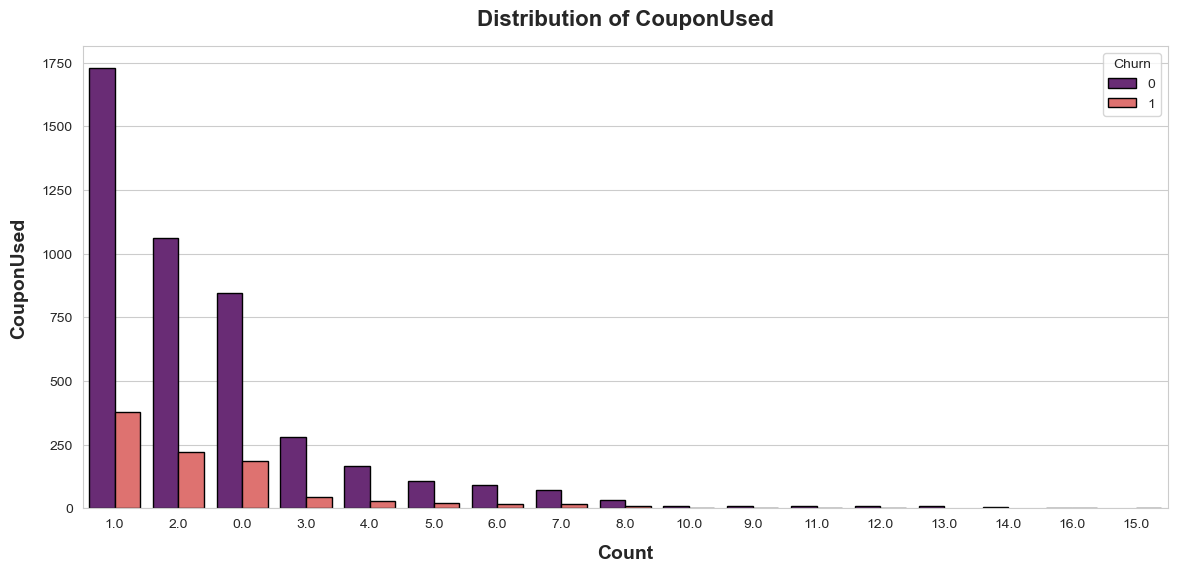

In [283]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["CouponUsed"], 
    order=df["CouponUsed"].value_counts().index, 
    palette="magma",  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("CouponUsed", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of CouponUsed", fontsize=16, fontweight="bold", pad=15)

plt.show()

## 🧾 Coupon Usage & Churn - Insights

### ✅ Summary:
- Most users used **0 to 2 coupons**
- Churners are mostly found among **low coupon users**

---

### 🔍 Key Insights:

1. **Low Coupon Use is Common**  
   Most customers used **1 or 2 coupons**, showing moderate adoption.

2. **Churn Linked to Low Coupon Use**  
   - Users with **0–1 coupons** are more likely to churn  
   - Could reflect **low engagement or missed promotions**

3. **High Coupon Users are Loyal**  
   - Churn drastically drops beyond **3 coupons used**  
   - Coupon redemption may indicate **increased stickiness**

4. **💡 Recommendation**  
   - Incentivize low coupon users  
   - Trigger campaigns for 0–2 users to **boost engagement**


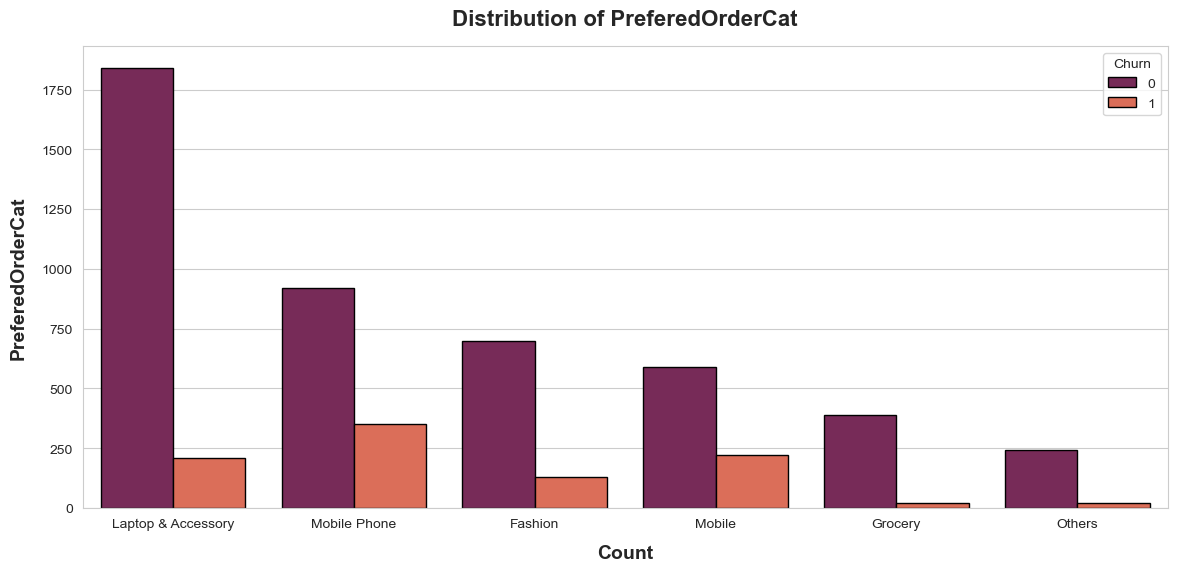

In [284]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["PreferedOrderCat"], 
    order=df["PreferedOrderCat"].value_counts().index, 
    palette="rocket",  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("PreferedOrderCat", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of PreferedOrderCat", fontsize=16, fontweight="bold", pad=15)

plt.show()

## 🛍️ Preferred Order Category vs Churn

### ✅ Summary:
- **Laptop & Accessory** leads in volume with **low churn**
- **Mobile Phone** category has **higher churn rate**

---

### 🔍 Key Insights:

1. **💻 Laptop & Accessory = Loyal Customers**
   - Highest number of users
   - Very low churn rate
   - Suggests stronger customer satisfaction or brand attachment

2. **📱 Mobile Phone = High Risk**
   - High churn rate despite large volume
   - Indicates need for targeted retention strategies

3. **📦 Smaller Categories**
   - Lower churn numbers
   - Might be good for upselling or bundling strategies

### 💡 Suggestion:
- Focus retention efforts on **Mobile Phone** segment
- Leverage loyalty from **Laptop buyers** for cross-sell


In [285]:
HoursVsOrder=df["OrderCount"].groupby(df["HourSpendOnApp"]).sum()
HoursVsOrder.sort_index(ascending=True)

HourSpendOnApp
0.0       2.0
1.0      96.0
2.0    3630.0
3.0    8039.0
4.0    3883.0
5.0      21.0
Name: OrderCount, dtype: float64

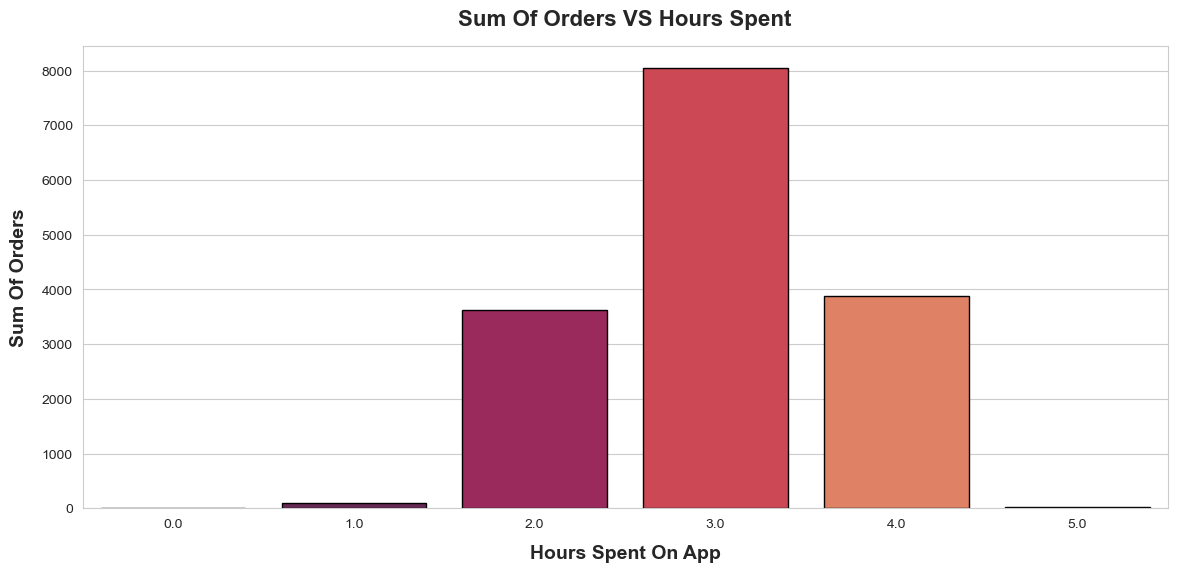

In [286]:
plt.figure(figsize=(14, 6))

sns.barplot(
    HoursVsOrder, 
    palette="rocket",  
    edgecolor="black",
)

plt.xlabel("Hours Spent On App", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Sum Of Orders", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Sum Of Orders VS Hours Spent", fontsize=16, fontweight="bold", pad=15)

plt.show()

# 📊 Insights: Sum of Orders vs. Hours Spent on App

## 🔍 Key Observations:
- **Highest orders** occur when users spend **~3 hours/day** on the app.
- **Very low orders** for users spending **<1 hour** or **>4 hours**.
- **Drop in orders** after the 3-hour peak, indicating diminishing returns.

## 📈 Insights:
1. **Sweet Spot for Engagement**  
   Users spending **2–4 hours** daily are the most active and likely to place more orders.

2. **Low-Time Users (0–1 hour)**  
   Likely casual visitors — may need onboarding, nudges, or offers to stay longer and convert.

3. **High-Time, Low Orders (5+ hours)**  
   Possible decision fatigue or poor UX — these users may need better guidance or streamlined UI.

## ✅ Recommendations:
- 🎯 **Target 2–4 hour users** with loyalty rewards or special offers.
- 🚀 **Re-engage low-time users** using push notifications or gamification.
- 🧪 **Analyze 5+ hour users** to improve experience and reduce friction to convert.


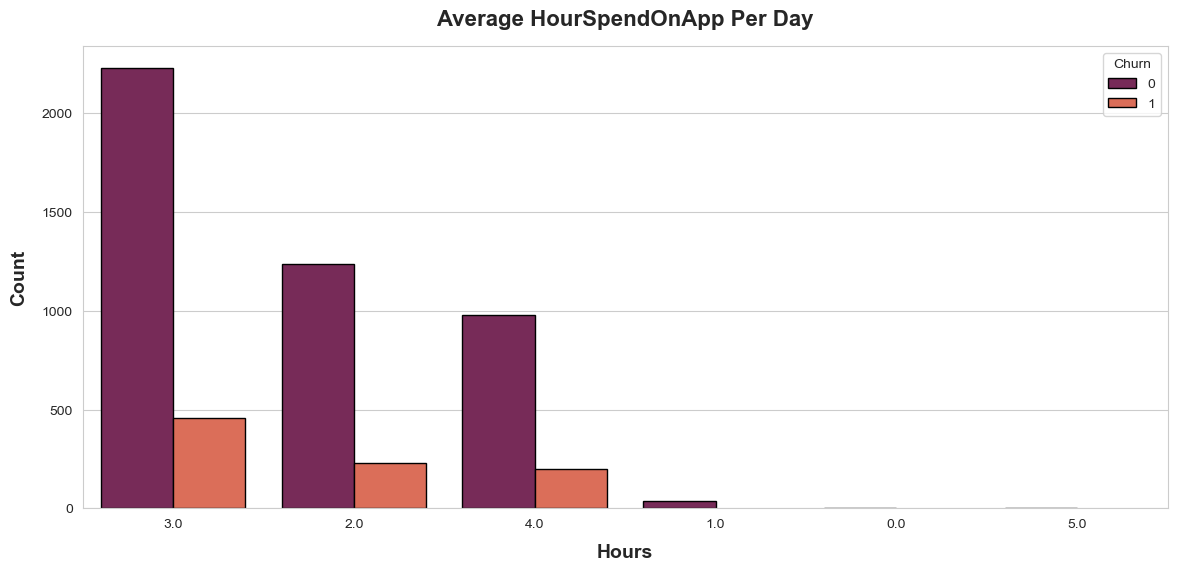

In [287]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["HourSpendOnApp"], 
    order=df["HourSpendOnApp"].value_counts().index, 
    palette="rocket",  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Hours", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Average HourSpendOnApp Per Day", fontsize=16, fontweight="bold", pad=15)

plt.show()

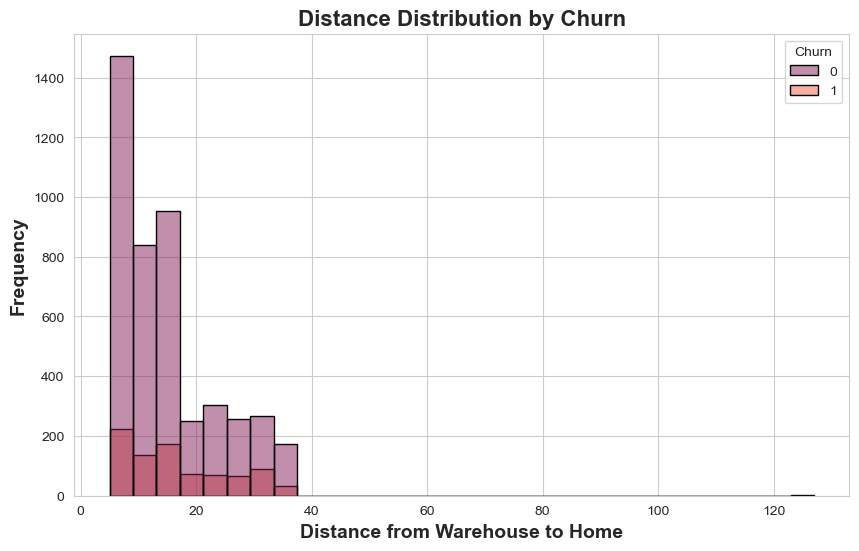

In [288]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="WarehouseToHome", hue="Churn", bins=30, kde=False, palette="rocket", edgecolor="black")

plt.xlabel("Distance from Warehouse to Home", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.title("Distance Distribution by Churn", fontsize=16, fontweight='bold')
plt.show()


### 📊 Insights: Distance from Warehouse to Home vs. Churn

1. **High Frequency at Short Distances**  
   - Most customers live within **5–20 units** from the warehouse.
   - This is expected in urban setups where warehouses are closer to customer hubs.

3. **Noticeable Churn at Short Distances**  
   - Even with better proximity, churn still occurs significantly at **short distances**.

4. **Lower Churn Counts at Long Distances**  
   - Fewer customers live far from the warehouse.
   - Churn appears lower, likely due to **low sample size**, not necessarily satisfaction.


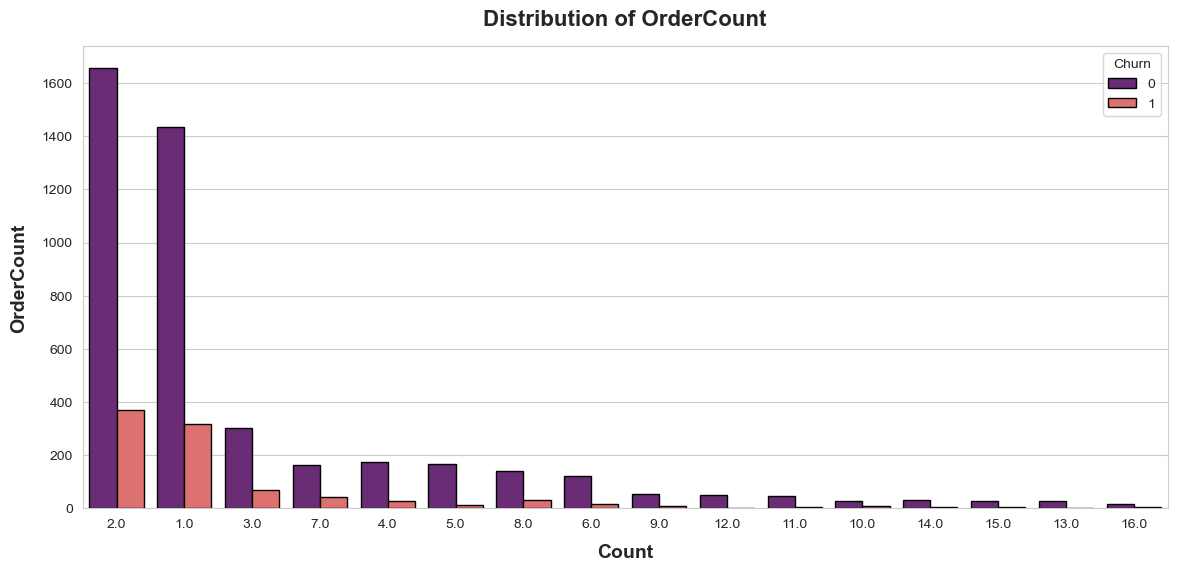

In [289]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["OrderCount"], 
    order=df["OrderCount"].value_counts().index, 
    palette="magma",  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("OrderCount", fontsize=14, labelpad=10, fontweight="bold")
plt.title("Distribution of OrderCount", fontsize=16, fontweight="bold", pad=15)

plt.show()

### 📊 Insights: Order Count vs. Churn

1. **Most Users Place Only 1–2 Orders**
   - The majority of users have **only 1 or 2 total orders**.
   - Indicates many customers are **new or infrequent users**.

2. **High Churn Among Low Order Counts**
   - A significant portion of churners fall in the **1–2 orders group**.
   - Suggests that many users **try the app once or twice**, then **never return**.

3. **Possible One-Time Use Behavior**
   - These users may have:
     - Achieved their goal with one purchase (e.g., a specific promo).
     - Faced a bad experience early on.
     - Had no further need for the service.

---

✅ **Actionable Suggestions:**

- Investigate **onboarding experience** and **first-order satisfaction**.
- Offer targeted **follow-up incentives** or **personalized retention messages** after 1st order.
- Analyze whether specific **products/services** are more prone to single-use customers.

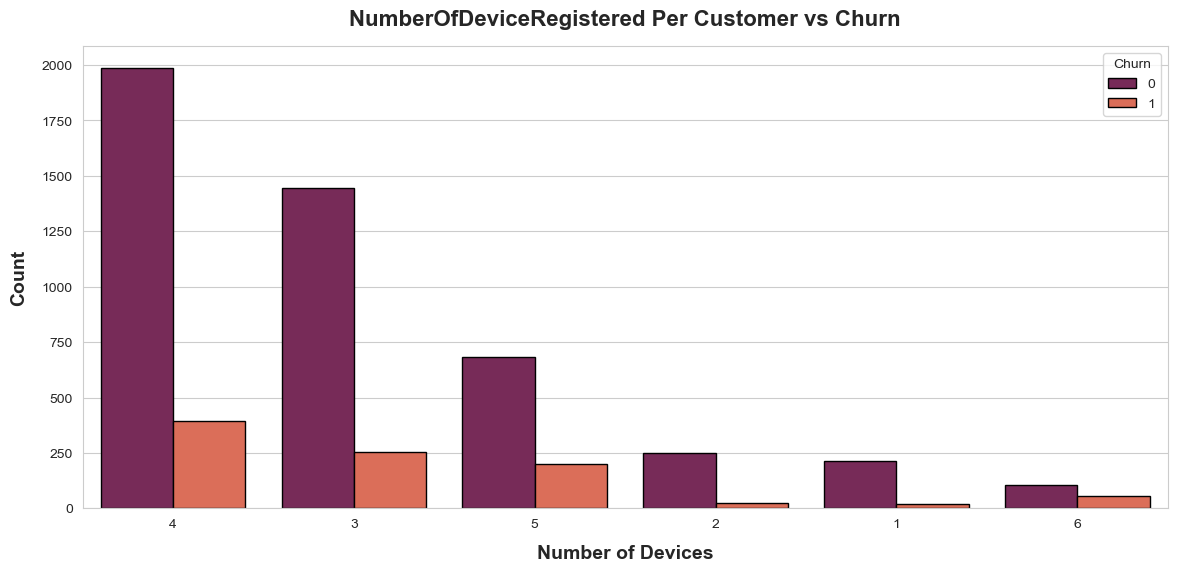

In [290]:
plt.figure(figsize=(14, 6))

sns.countplot(
    x=df["NumberOfDeviceRegistered"], 
    order=df["NumberOfDeviceRegistered"].value_counts().index, 
    palette="rocket",  
    edgecolor="black",
    hue=df["Churn"]
)

plt.xlabel("Number of Devices", fontsize=14, labelpad=10, fontweight="bold")
plt.ylabel("Count", fontsize=14, labelpad=10, fontweight="bold")
plt.title("NumberOfDeviceRegistered Per Customer vs Churn", fontsize=16, fontweight="bold", pad=15)

plt.show()

### 📱 Insights: Number of Devices Registered vs. Churn

1. **Higher Device Count = Lower Churn**
   - Users with **3–5 registered devices** show **lower churn rates**.
   - This suggests strong engagement — likely from households with multiple users or individuals accessing the app from different devices (phone, tablet, smart TV, etc.).

2. **Lower Device Count = Higher Churn Tendency**
   - Users with only **1–2 devices** have a higher churn percentage.
   - These users may be **less engaged**, possibly just trying the app or using it occasionally.

3. **Device Count Reflects App Preference**
   - A higher number of registered devices may indicate that the customer **likes the app**, feels comfortable using it, and possibly considers it their **preferred platform**.
   - This behavior suggests they’re **using the app frequently** and in various contexts (e.g., home, work, on the go).

---

✅ **Actionable Suggestions:**
- Encourage users to **register the app across all their devices**.
- Promote multi-device use by highlighting benefits (e.g., seamless sync, personalized experience).


In [291]:

ordercat_churnrate = pd.DataFrame(df.groupby('PreferedOrderCat')['Gender'].value_counts()) 
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()

fig = px.histogram (ordercat_churnrate, x='PreferedOrderCat', y = 'count',
                     color='Gender', barmode ='group', title="<b>"+"Prefered Category Vs Gender", text_auto= True)

fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count')

fig.show()

In [292]:

fig=px.histogram (df, x="PreferredPaymentMode", facet_col="CityTier", color="CityTier", text_auto= True,
                   title="<b>"+"CityTier Vs PaymentMethod")
fig.update_layout (hovermode='x', title_font_size=30)

fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count')

fig.show()

# 📊 CityTier vs Preferred Payment Method – Insights

## 🏙️ CityTier 1 (Urban - Red)
- **Highest user count**
- **Top Payment Modes**:
  - 💳 Debit Card: 1676
  - 💳 Credit Card: 1147
- Also used: UPI (242), COD (260), CC (235)
- ✅ **Insight**: Preference for **bank-based digital payments**

---

## 🏙️ CityTier 2 (Semi-Urban - Green)
- **Lowest user count**
- **Top Payment Mode**:
  - 📱 UPI: 114
- Other modes barely used
- ✅ **Insight**: **Low engagement**, with some use of **UPI**

---

## 🏙️ CityTier 3 (Rural - Blue)
- **Moderate user count**
- **Top Payment Modes**:
  - 👜 E-Wallet: 614
  - 💳 Debit Card: 576
- Also notable: Credit Card (316)
- ✅ **Insight**: Strong preference for **wallets and debit cards**

---

## 🔎 Overall Insights
- Tier 1: **Bank cards dominate**
- Tier 2: **UPI preferred**, low usage overall
- Tier 3: **Wallets & debit cards popular**
- COD & CC are least used in all tiers

In [293]:
fig = px.histogram(
    df, 
    x="HourSpendOnApp", 
    y="SatisfactionScore", 
    orientation="h", 
    color="Churn",
    text_auto=True,
    title="<b>Sum of Hours Spend On App Vs SatisfactionScore",
    color_discrete_sequence=['#BA1F33', '#3A506B', '#3E885B']
)

fig.update_layout(
    hovermode='x',
    title_font_size=30,
    title_font_color="black",
    template="plotly",
    title_x=0.5,
    xaxis_title='Sum of Hours Spend On App',
    yaxis_title='SatisfactionScore',
    hoverlabel_font_size=20,
    bargap=0.3
)

fig.show()

# 📊 Sum of Hours Spent vs Satisfaction Score (by Churn)

## ✅ Key Insights

### 1. 🔥 Score = 3 → Most Valuable
- Highest total usage (~3933 hours, non-churned)
- Users are **highly engaged** and **loyal**

### 2. ⚠️ Score = 1 → High Usage, High Risk
- ~2862 hours spent even with low satisfaction
- Still, **372 users churned**
- Suggests users are active but **frustrated**

### 3. 🔁 Churn Across All Scores
- Churn exists even at **high satisfaction (Score 5 → 762 churned)**
- Indicates churn is influenced by **more than just satisfaction**

### 4. 💤 Score = 2 → Low Usage
- Lowest total hours (~1617)
- Users are **disengaged** and still partially churn

# Preprocessing (Handling Nulls , Outliers , Duplicates)

In [294]:
df.shape

(5630, 19)

In [295]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Churn,int64,"[0, 1]",2,0,0.000000,556
1,Tenure,float64,"[1.0, 0.0, 8.0, 9.0, 7.0, 10.0, 5.0, 4.0, 3.0,...",36,264,4.689165,556
2,PreferredLoginDevice,object,"[Mobile Phone, Computer, Phone]",3,0,0.000000,556
3,CityTier,int64,"[1, 3, 2]",3,0,0.000000,556
4,WarehouseToHome,float64,"[9.0, 8.0, 7.0, 16.0, 14.0, 6.0, 15.0, 10.0, 1...",34,251,4.458259,556
5,PreferredPaymentMode,object,"[Debit Card, Credit Card, E wallet, UPI, COD, ...",7,0,0.000000,556
6,Gender,object,"[Male, Female]",2,0,0.000000,556
7,HourSpendOnApp,float64,"[3.0, 2.0, 4.0, 1.0, 0.0, 5.0]",6,255,4.529307,556
8,NumberOfDeviceRegistered,int64,"[4, 3, 5, 2, 1, 6]",6,0,0.000000,556
9,PreferedOrderCat,object,"[Laptop & Accessory, Mobile Phone, Fashion, Mo...",6,0,0.000000,556


# Filling Nulls with (mode, Nearest 2 Neighbors, median, mean)

Mode

In [296]:
df["HourSpendOnApp"]=df["HourSpendOnApp"].fillna(df["HourSpendOnApp"].mode()[0])

N2N

In [297]:
df["OrderAmountHikeFromlastYear"]=df["OrderAmountHikeFromlastYear"].fillna(method='ffill').fillna(method='bfill')
df["WarehouseToHome"]=df["WarehouseToHome"].fillna(method='ffill').fillna(method='bfill')
df["Tenure"]=df["Tenure"].fillna(method='ffill').fillna(method='bfill')
df["CouponUsed"]=df["CouponUsed"].fillna(method='ffill').fillna(method='bfill')
df["DaySinceLastOrder"]=df["DaySinceLastOrder"].fillna(method='ffill').fillna(method='bfill')

median

In [298]:
df["OrderCount"]=df["OrderCount"].fillna(df["OrderCount"].median())

In [299]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Churn,int64,"[0, 1]",2,0,0.0,530
1,Tenure,float64,"[1.0, 0.0, 8.0, 9.0, 7.0, 10.0, 4.0, 5.0, 3.0,...",36,0,0.0,530
2,PreferredLoginDevice,object,"[Mobile Phone, Computer, Phone]",3,0,0.0,530
3,CityTier,int64,"[1, 3, 2]",3,0,0.0,530
4,WarehouseToHome,float64,"[9.0, 8.0, 7.0, 16.0, 14.0, 6.0, 15.0, 10.0, 1...",34,0,0.0,530
5,PreferredPaymentMode,object,"[Debit Card, Credit Card, E wallet, UPI, COD, ...",7,0,0.0,530
6,Gender,object,"[Male, Female]",2,0,0.0,530
7,HourSpendOnApp,float64,"[3.0, 2.0, 4.0, 1.0, 0.0, 5.0]",6,0,0.0,530
8,NumberOfDeviceRegistered,int64,"[4, 3, 5, 2, 1, 6]",6,0,0.0,530
9,PreferedOrderCat,object,"[Laptop & Accessory, Mobile Phone, Fashion, Mo...",6,0,0.0,530


# Handling Outliers

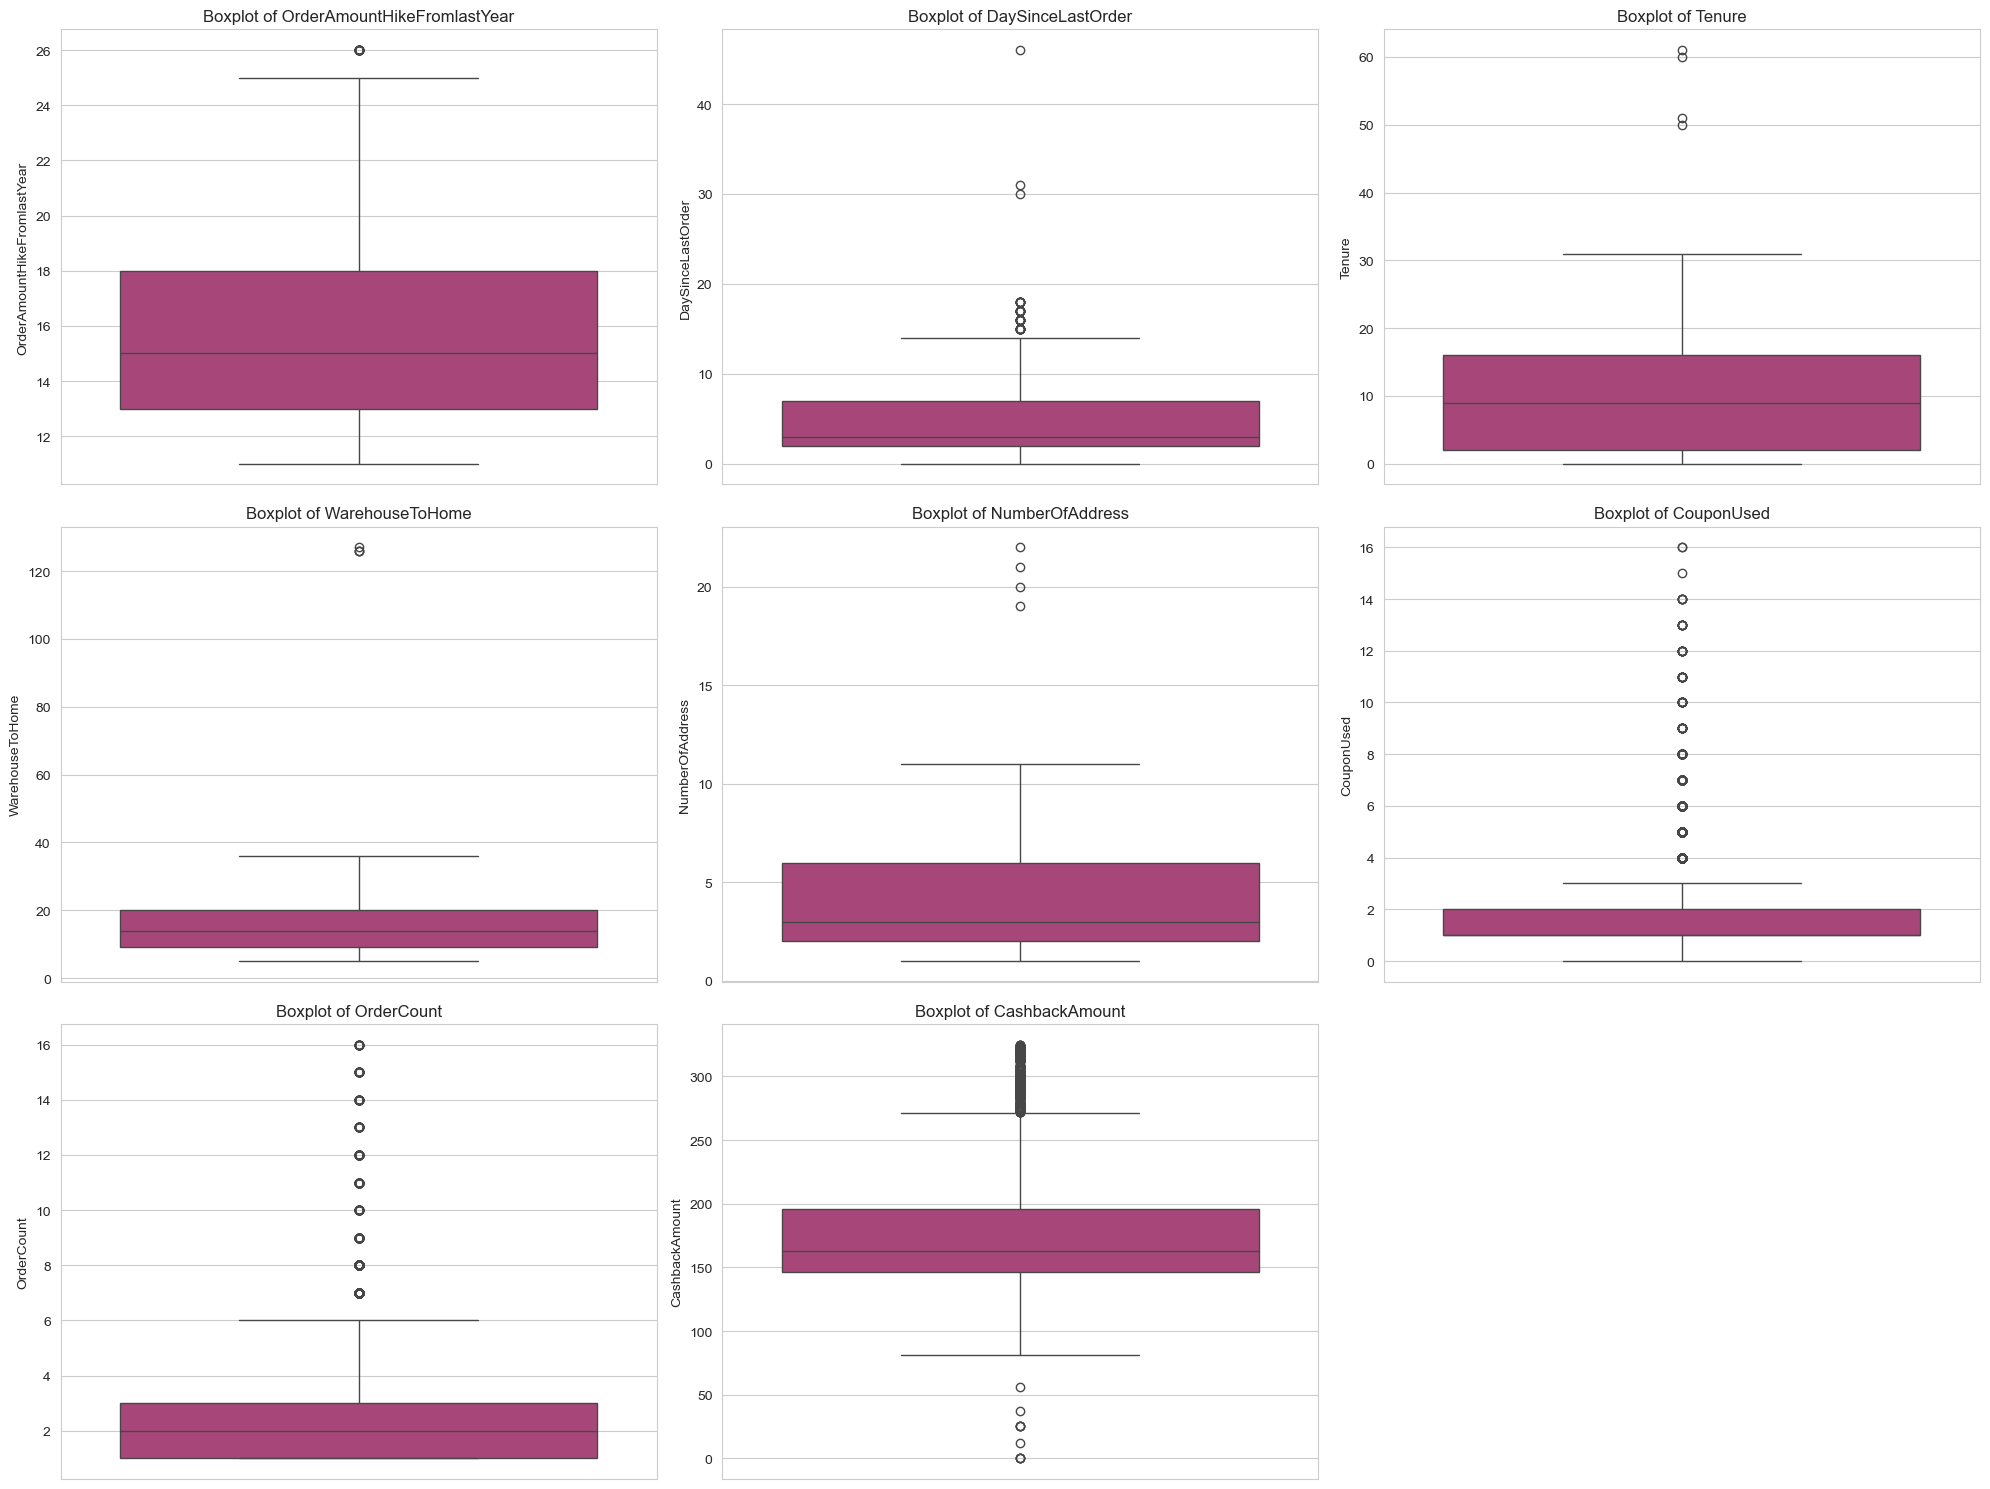

In [300]:
checkOutliers=["OrderAmountHikeFromlastYear","DaySinceLastOrder","Tenure","WarehouseToHome",
               "NumberOfAddress","CouponUsed","OrderCount","CashbackAmount"]

fig, axes = plt.subplots(3, 3, figsize=(20, 5 * 3))

axes = axes.flatten()

for i, col in enumerate(checkOutliers):
    sns.boxplot(data=df, y=col, ax=axes[i], palette='magma',whis=1.5)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [301]:
# Function to handle outliers
def handle_Numerical_outliers(data):
    """
    This function handles outliers.
    """
    num_cols = data.select_dtypes(include="number").columns
   
    for col in num_cols:
        
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)

        data[col]=np.where(data[col]<lower_bound,lower_bound,data[col])
        data[col]=np.where(data[col]>upper_bound,upper_bound,data[col])

In [302]:
dfTemp=df[checkOutliers]

In [303]:
handle_Numerical_outliers(dfTemp)

df[checkOutliers]=dfTemp[checkOutliers]

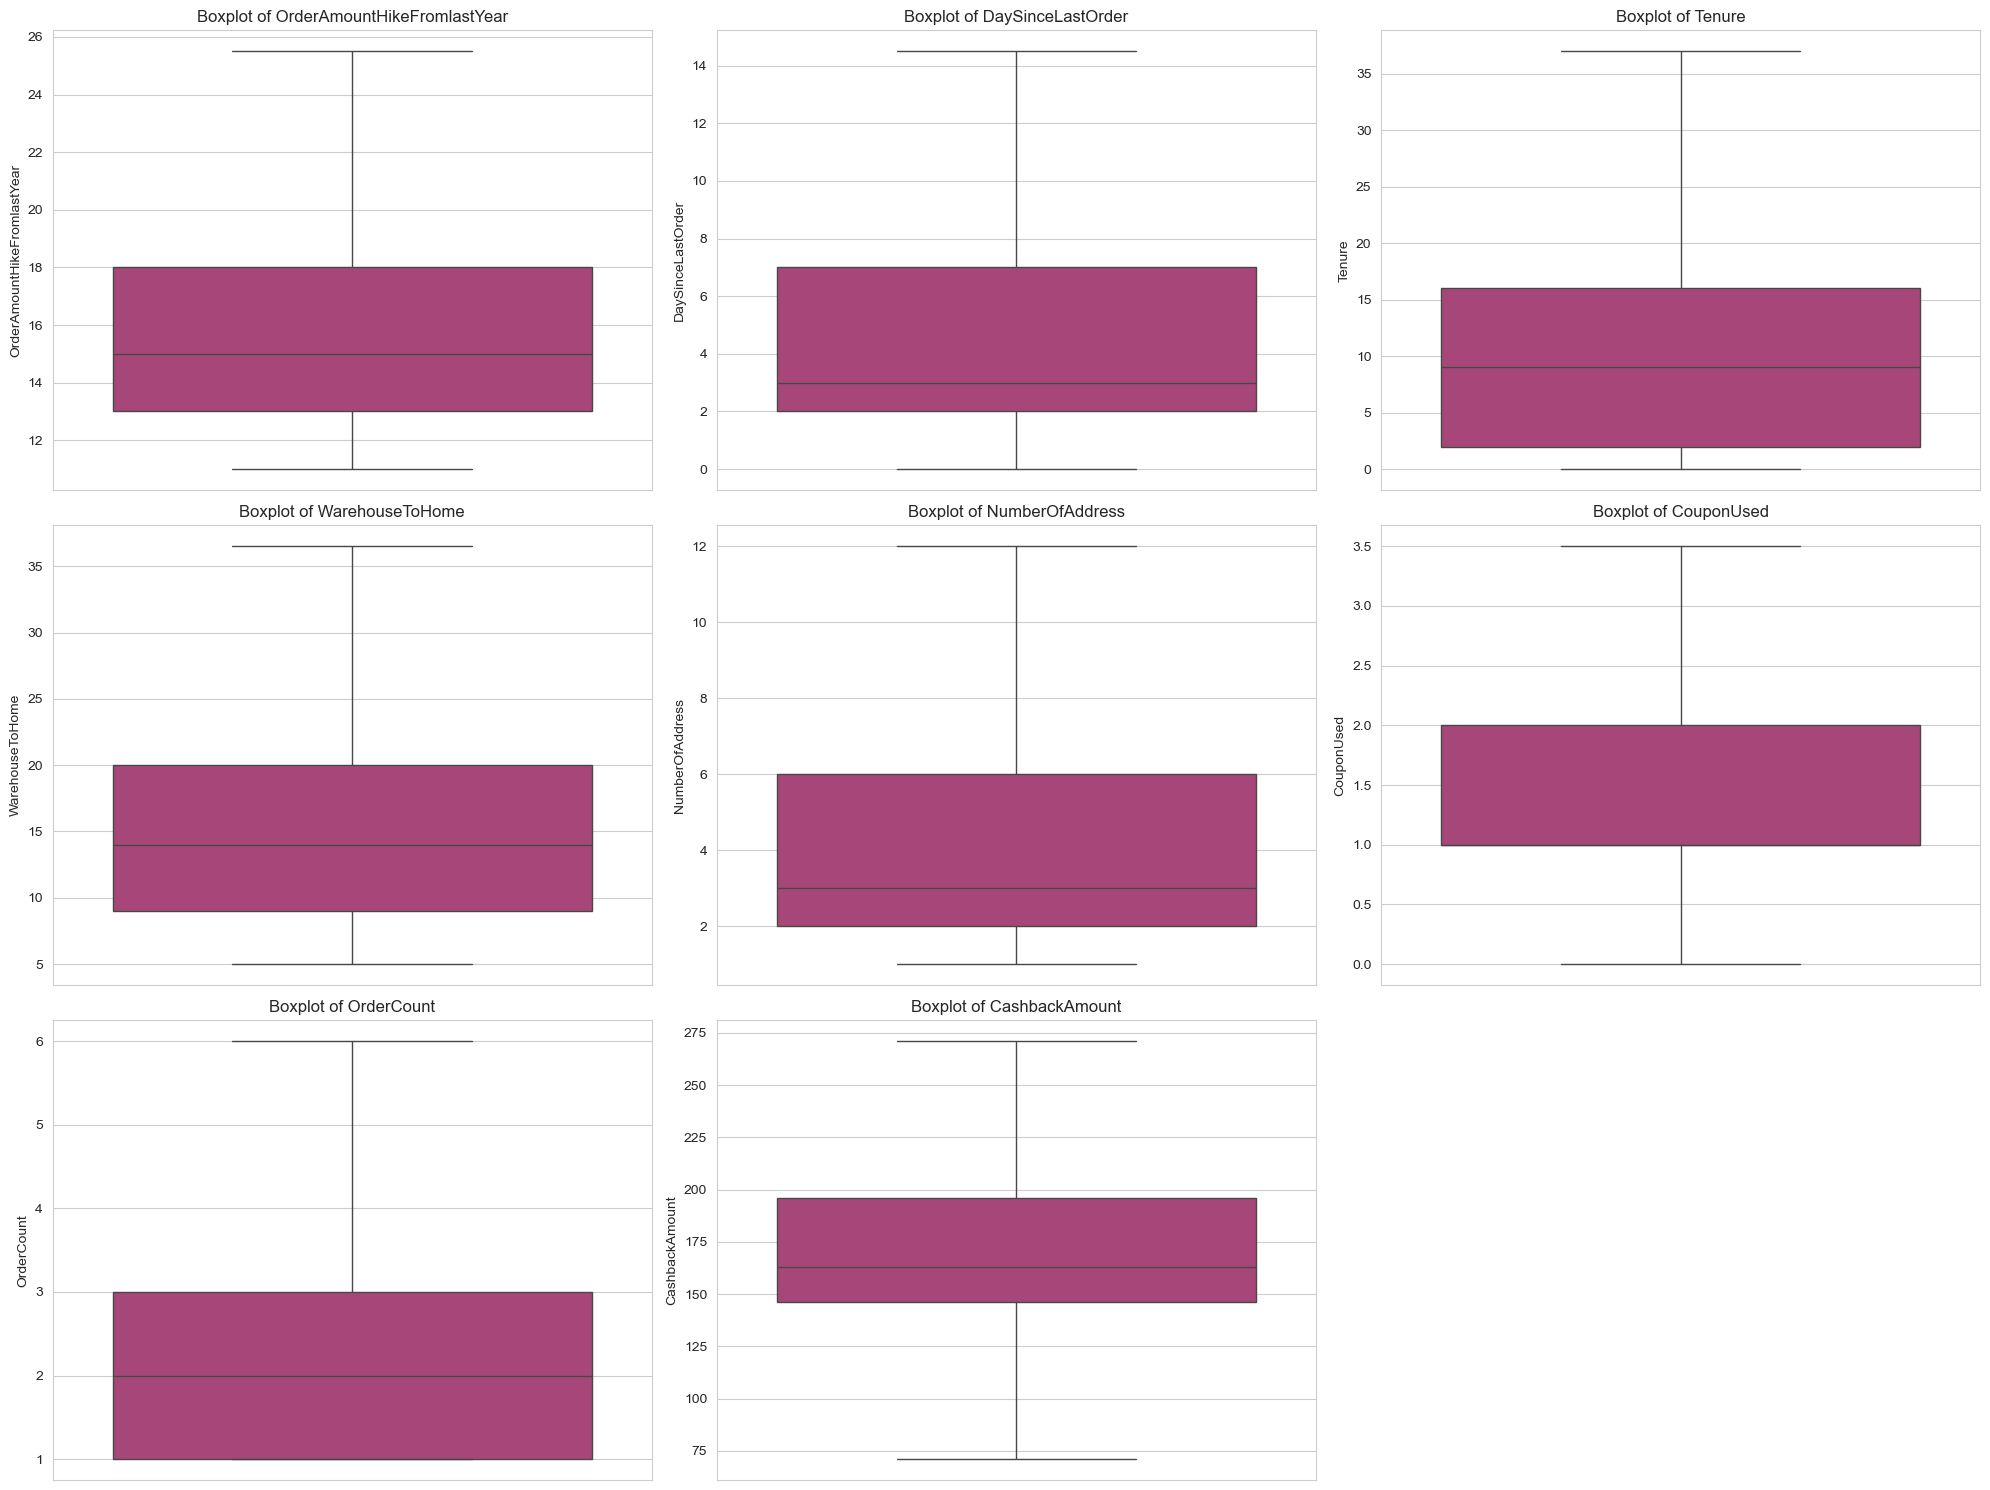

In [304]:
fig, axes = plt.subplots(3, 3, figsize=(20, 5 * 3))

axes = axes.flatten()

for i, col in enumerate(checkOutliers):
    sns.boxplot(data=df, y=col, ax=axes[i], palette='magma',whis=1.5)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Feature Engineering

In [305]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Churn,int64,"[0, 1]",2,0,0.0,585
1,Tenure,float64,"[1.0, 0.0, 8.0, 9.0, 7.0, 10.0, 4.0, 5.0, 3.0,...",33,0,0.0,585
2,PreferredLoginDevice,object,"[Mobile Phone, Computer, Phone]",3,0,0.0,585
3,CityTier,int64,"[1, 3, 2]",3,0,0.0,585
4,WarehouseToHome,float64,"[9.0, 8.0, 7.0, 16.0, 6.0, 14.0, 15.0, 10.0, 1...",33,0,0.0,585
5,PreferredPaymentMode,object,"[Debit Card, Credit Card, E wallet, UPI, COD, ...",7,0,0.0,585
6,Gender,object,"[Male, Female]",2,0,0.0,585
7,HourSpendOnApp,float64,"[3.0, 2.0, 4.0, 1.0, 0.0, 5.0]",6,0,0.0,585
8,NumberOfDeviceRegistered,int64,"[4, 3, 5, 2, 1, 6]",6,0,0.0,585
9,PreferedOrderCat,object,"[Laptop & Accessory, Mobile Phone, Fashion, Mo...",6,0,0.0,585


# 1- Average orders for each Customer Per Hour

In [306]:
df["AvgOrdersPerHour"]=df["HourSpendOnApp"]/df["OrderCount"]

In [307]:
f_scores, p_values = f_classif(df[["AvgOrdersPerHour"]], df["Churn"])

anova_df = pd.DataFrame({
    'Feature': "AVG",
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_df)


  Feature    F-Score   P-Value
0     AVG  11.539037  0.000686


# 2-Average CashBack Based on Order count and grouped by each category

In [308]:
df["AvgCashBackperCategory"]=df["CashbackAmount"]/df["OrderCount"]

In [309]:
x=df["AvgCashBackperCategory"].groupby(df["PreferedOrderCat"]).mean()
x=dict(x)

for idx,cat in df["PreferedOrderCat"].items():
    for key in x.keys():
        if cat==key:
            df["AvgCashBackperCategory"][idx]=x[key]

In [310]:
f_scores, p_values = f_classif(df[["AvgCashBackperCategory"]], df["Churn"])

anova_df = pd.DataFrame({
    'Feature': "AVG",
    'F-Score': f_scores,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_df)

  Feature     F-Score       P-Value
0     AVG  104.288676  2.844368e-24


# 3- divide Tenure based on The years Spent

In [311]:
df["LoyaltyScore"]=df["Tenure"].apply(lambda x: 1 if x<=12 else (2 if x<=24 else 3))

In [312]:
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(df[["LoyaltyScore"]], df["Churn"])

chi_scores = pd.DataFrame({
    'Feature': "Loya",
    'Chi2 Score': chi_selector.scores_,
    'P-Value': chi_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print(chi_scores)

  Feature  Chi2 Score       P-Value
0    Loya   71.301728  3.065672e-17


# 4- frequency of Orders Categorized

In [313]:
df["OrderFrequencyBin"]=df["OrderCount"].apply(lambda x: 1 if x<=2 else (2 if x<=4 else 3))

# Drop Duplicates After New Features

In [314]:
df.drop_duplicates(inplace=True)

In [315]:
data_info(df)

,Name,Data_Type,Top_10_Unique_Values,Nunique_Values,Nulls,Percent_of_Nulls,Duplicates
0,Churn,int64,"[0, 1]",2,0,0.0,0
1,Tenure,float64,"[1.0, 0.0, 8.0, 9.0, 7.0, 10.0, 4.0, 5.0, 3.0,...",33,0,0.0,0
2,PreferredLoginDevice,object,"[Mobile Phone, Computer, Phone]",3,0,0.0,0
3,CityTier,int64,"[1, 3, 2]",3,0,0.0,0
4,WarehouseToHome,float64,"[9.0, 8.0, 7.0, 6.0, 16.0, 14.0, 15.0, 10.0, 1...",33,0,0.0,0
5,PreferredPaymentMode,object,"[Debit Card, Credit Card, E wallet, UPI, COD, ...",7,0,0.0,0
6,Gender,object,"[Male, Female]",2,0,0.0,0
7,HourSpendOnApp,float64,"[3.0, 2.0, 4.0, 1.0, 0.0, 5.0]",6,0,0.0,0
8,NumberOfDeviceRegistered,int64,"[4, 3, 5, 2, 1, 6]",6,0,0.0,0
9,PreferedOrderCat,object,"[Laptop & Accessory, Mobile Phone, Fashion, Mo...",6,0,0.0,0


# Split Tha Data

In [316]:
X=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [317]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling

In [318]:
li=["Tenure","WarehouseToHome","NumberOfAddress","CashbackAmount","AvgOrdersPerHour","AvgCashBackperCategory",
    "DaySinceLastOrder","OrderAmountHikeFromlastYear"]


for i in li:
    x_train[i]=np.log1p(x_train[i])
    x_test[i]=np.log1p(x_test[i])

scaler = StandardScaler()
x_train[li] = scaler.fit_transform(x_train[li])
x_test[li] = scaler.transform(x_test[li])

# Encoding

In [319]:
one_Hot=["PreferredLoginDevice","PreferredPaymentMode","Gender","PreferedOrderCat","MaritalStatus"]

one_hot=OneHotEncoder(cols=one_Hot, drop_invariant=True, use_cat_names=True)

x_train=one_hot.fit_transform(x_train)
x_test=one_hot.transform(x_test)

# Correlation

numerical

In [320]:
num_list=["Tenure","WarehouseToHome","OrderAmountHikeFromlastYear","DaySinceLastOrder","NumberOfAddress",
          "CashbackAmount","AvgOrdersPerHour","AvgCashBackperCategory"]

x = x_train[num_list]
y = y_train

f_values, p_values = f_classif(x, y)

anova_df = pd.DataFrame({
    'Feature': num_list,
    'F-Score': f_values,
    'P-Value': p_values
}).sort_values(by='F-Score', ascending=False)

print(anova_df)

                       Feature     F-Score        P-Value
0                       Tenure  881.444547  2.284895e-175
3            DaySinceLastOrder  145.012779   7.755004e-33
5               CashbackAmount   96.359257   1.708235e-22
7       AvgCashBackperCategory   71.160512   4.529928e-17
1              WarehouseToHome   17.075593   3.664991e-05
4              NumberOfAddress    8.577472   3.422535e-03
6             AvgOrdersPerHour    4.814272   2.828183e-02
2  OrderAmountHikeFromlastYear    1.025382   3.113065e-01


Categorical

In [321]:
num_list=["Tenure","WarehouseToHome","OrderAmountHikeFromlastYear","DaySinceLastOrder","NumberOfAddress",
          "CashbackAmount","AvgOrdersPerHour","AvgCashBackperCategory"]

x=x_train.drop(num_list,axis=1)
y=y_train

chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(x, y)

chi2_scores = pd.DataFrame({
    'Feature': x.columns,
    'Chi2 Score': chi2_selector.scores_,
    'P-Value': chi2_selector.pvalues_
}).sort_values(by='Chi2 Score', ascending=False)

print(chi2_scores)

                                  Feature  Chi2 Score       P-Value
25                               Complain  192.442858  9.313766e-44
22                   MaritalStatus_Single   85.492778  2.325494e-20
15          PreferedOrderCat_Mobile Phone   65.860550  4.839828e-16
28                           LoyaltyScore   52.637708  4.011136e-13
17    PreferedOrderCat_Laptop & Accessory   39.656423  3.028072e-10
24                  MaritalStatus_Married   36.849744  1.275928e-09
18                PreferedOrderCat_Mobile   36.507921  1.520471e-09
16               PreferedOrderCat_Grocery   30.495909  3.345713e-08
10               PreferredPaymentMode_COD   27.940152  1.251262e-07
21                      SatisfactionScore   25.816378  3.754887e-07
1       PreferredLoginDevice_Mobile Phone   20.116193  7.287703e-06
2              PreferredLoginDevice_Phone   18.344919  1.843098e-05
3                                CityTier   17.199679  3.364932e-05
14               NumberOfDeviceRegistered   15.1

In [322]:
# x_train=x_train.drop(["OrderAmountHikeFromlastYear"],axis=1)
# x_test=x_test.drop(["OrderAmountHikeFromlastYear"],axis=1)

In [323]:
cat_drop=[
    'PreferredPaymentMode_Credit Card',
    'PreferredPaymentMode_E wallet',
    'PreferredLoginDevice_Computer',
    'Gender_Female',
    'PreferredPaymentMode_CC',
    'MaritalStatus_Divorced',
    'PreferredPaymentMode_Debit Card',
    'Gender_Male',
    'OrderCount',
    'OrderFrequencyBin',
    'PreferredPaymentMode_Cash on Delivery',
    'HourSpendOnApp',
    'PreferredPaymentMode_UPI',
    'PreferedOrderCat_Fashion',
    'CouponUsed'
]

# x_train.drop(cat_drop,axis=1,inplace=True)
# x_test.drop(cat_drop,axis=1,inplace=True)

# Balancing The Data

In [324]:
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [325]:
x_train.shape

(6750, 38)

# PCA

In [326]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 0.95)  
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)

# Model Training

# RandomForest With Grid Search

In [327]:
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'max_depth': [None, 10, 20, 30],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 4],    
#     'max_features': ['auto', 'sqrt', 'log2']  
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',  
#     n_jobs=-1,  
#     verbose=1
# )

# grid_search.fit(x_train, y_train)
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(x_test)
# y_pred_train= best_rf.predict(x_train)

# print("Best Parameters:", grid_search.best_params_)

# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Accuracy: 1.0
Test Accuracy: 0.9395441030723488

# Random Forest with best parameters from Grid Search

In [328]:
rf = RandomForestClassifier(max_depth=8, max_features= 'log2', min_samples_leaf=15, min_samples_split= 9, n_estimators=200,random_state=42)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_train= rf.predict(x_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.9197037037037037
Test Accuracy: 0.8612487611496531


# Logistic Regression with Grid Search

In [329]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Create the model
# log_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse)
#     'class_weight': [None, 'balanced']  # Handle imbalance if any
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=log_reg,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',  # You can use 'neg_log_loss', 'f1', etc.
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Best model
# best_log_reg = grid_search.best_estimator_

# # Predictions
# y_pred = best_log_reg.predict(x_test)
# y_pred_train = best_log_reg.predict(x_train)

# # Results
# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Logistic Regression with best parameters from Grid Search

In [330]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='newton-cg', max_iter=1000, C = 1, penalty="l2" , random_state=42)

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
y_pred_train = log_reg.predict(x_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.8992592592592593
Test Accuracy: 0.8662041625371655


# SVM with Grid Search

In [331]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Create the model
# svm_model = SVC(probability=True, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],           # Regularization parameter
#     'kernel': ['linear', 'rbf'],     # Kernel type
#     'gamma': ['scale', 'auto'],      # Kernel coefficient for 'rbf'
#     'class_weight': [None, 'balanced']  # Handle class imbalance
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=svm_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',  # You can also try 'f1', 'roc_auc', etc.
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Best model
# best_svm = grid_search.best_estimator_

# # Predictions
# y_pred = best_svm.predict(x_test)
# y_pred_train = best_svm.predict(x_train)

# # Results
# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Train Accuracy: 0.9991111111111111
Test Accuracy: 0.9653121902874133

# SVM With best parameters from Grid Search

In [332]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(probability=True, C = 100, kernel = "rbf" ,gamma = "auto", class_weight = None ,random_state=42)
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)
y_pred_train = svm_model.predict(x_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.9991111111111111
Test Accuracy: 0.9653121902874133


# XGBoost with Grid Search

In [333]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Create the base model
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200],            # Number of boosting rounds
#     'max_depth': [3, 5, 7],                # Maximum tree depth
#     'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
#     'subsample': [0.8, 1],                 # Row subsampling
#     'colsample_bytree': [0.8, 1],          # Feature subsampling
#     'gamma': [0, 1],                       # Minimum loss reduction
#     'reg_alpha': [0, 0.1],                 # L1 regularization
#     'reg_lambda': [1, 10]                  # L2 regularization
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Get the best model
# best_xgb = grid_search.best_estimator_

# # Make predictions
# y_pred = best_xgb.predict(x_test)
# y_pred_train = best_xgb.predict(x_train)

# # Results
# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}
Train Accuracy: 0.9954074074074074
Test Accuracy: 0.9276511397423192

# XGBoost with best parameters from Grid Search

In [334]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, colsample_bytree=0.8, gamma= 0, learning_rate = 0.1, 
                          max_depth = 6, n_estimators = 170, reg_alpha = 0.13, reg_lambda = 1,
                            subsample = 0.8, eval_metric = 'logloss', random_state=42)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)
y_pred_train = xgb_model.predict(x_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.9976296296296296
Test Accuracy: 0.9435084241823588


# CATBOOST with Grid Search

In [335]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Create the base model
# cat_model = CatBoostClassifier(verbose=0, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'iterations': [100, 200],
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.1],
#     'l2_leaf_reg': [1, 3, 5],  # L2 regularization
#     'bagging_temperature': [0, 1]  # Controls overfitting via stochastic bagging
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=cat_model,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the model
# grid_search.fit(x_train, y_train)

# # Best model
# best_cat = grid_search.best_estimator_

# # Predictions
# y_pred = best_cat.predict(x_test)
# y_pred_train = best_cat.predict(x_train)

# # Results
# print("Best Parameters:", grid_search.best_params_)
# print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
# print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bagging_temperature': 0, 'depth': 8, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Train Accuracy: 0.9983703703703704
Test Accuracy: 0.9534192269573836

# CATBOOST with best parameters from Grid Search

In [336]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

cat_model = CatBoostClassifier(verbose = 0 , depth = 6, iterations = 135, l2_leaf_reg = 0.7,
                               learning_rate = 0.02 , random_state=42)

cat_model.fit(x_train, y_train)

y_pred = cat_model.predict(x_test)
y_pred_train = cat_model.predict(x_train)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.9293333333333333
Test Accuracy: 0.8840436075322101
